In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
from plotnine import *
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Read the summarized final table**

In [ ]:
calculated_final=pd.read_csv("/content/drive/My Drive/UC Berkeley/IAV_seq_results/overall_summary.csv")

/tmp/ipython-input-4-1312275547.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.


In [ ]:
print(calculated_final.columns)

Index(['Unnamed: 0', 'sample_name', 'sample_id', 'library_id', 'WW_method',
       'strain', 'dPCR_postFreeze_thaw_gc_ul', 'sequencing_method', 'segment',
       'coverage', 'total_len', 'covbases', 'mean_depth', 'mapped_reads',
       'cutadapt', 'deduplicated', 'filtered', 'paired', 'raw', 'accession',
       'POSITION', 'COVERAGE', 'method', 'segment_number', 'mapped_rpkm_raw',
       'mapped_rpkm_undedupe', 'DP_rpkm_raw', 'DP_rpkm_undedupe',
       'gene copies'],
      dtype='object')


In [ ]:
print(calculated_final['sequencing_method'].unique())

['Universal-amplicon' 'Tiled-amplicon' 'Twist_comprehensive' 'Twist_IAV'
 'unenriched']


# **Section 3.1 Comparison of four sequencing methods**

In [ ]:
DM_HA = calculated_final[(calculated_final.segment == 'HA')&(calculated_final.WW_method == 'DM')]
DM_HA=DM_HA[~DM_HA['sample_id'].isin(['S4'])]
print(DM_HA['strain'].unique())
DM_HA.head()

['H1N1' 'H3N1' 'H3N2' 'H5N1']


Unnamed: 0 sample_name sample_id library_id WW_method strain  \
0        1521784       S1_31        S1         31        DM   H1N1   
4560     1526344       S1_31        S1         31        DM   H3N1   
4568     1526352       S1_31        S1         31        DM   H3N2   
4569     1526353       S1_31        S1         31        DM   H3N2   
4570     1526354       S1_31        S1         31        DM   H3N2   

      dPCR_postFreeze_thaw_gc_ul   sequencing_method segment  coverage  ...  \
0                          5.352  Universal-amplicon      HA    0.0000  ...   
4560                       2.836  Universal-amplicon      HA    0.0000  ...   
4568                       1.488  Universal-amplicon      HA   98.1591  ...   
4569                       1.488  Universal-amplicon      HA   98.1591  ...   
4570                       1.488  Universal-amplicon      HA   98.1591  ...   

       accession  POSITION  COVERAGE              method  segment_number  \
0            NaN       NaN       NaN                 NaN             NaN   
4560         NaN       NaN       NaN                 NaN             NaN   
4568  CY113733.1       1.0       1.0  Universal-amplicon             4.0   
4569  CY113733.1       2.0       1.0  Universal-amplicon             4.0   
4570  CY113733.1       3.0       1.0  Universal-amplicon             4.0   

      mapped_rpkm_raw  mapped_rpkm_undedupe  DP_rpkm_raw  DP_rpkm_undedupe  \
0            0.000000              0.000000          NaN               NaN   
4560         0.000000              0.000000          NaN               NaN   
4568         1.370292             56.673433     6.735645         142.30344   
4569         1.370292             56.673433     6.735645         142.30344   
4570         1.370292             56.673433     6.735645         142.30344   

     gene copies  
0          26.76  
4560       14.18  
4568        7.44  
4569        7.44  
4570        7.44  

[5 rows x 29 columns]

## **Figure 1a: HA segment mapped reads RPKM and coverage breadth**

In [ ]:
# replace all 0 value with nan
DM_HA['mapped_rpkm_undedupe'] = DM_HA['mapped_rpkm_undedupe'].replace(0, float('nan'))
# Compute mean and standard error
summary_DM_HA = (DM_HA.groupby(['sample_id', 'sequencing_method', 'strain'], as_index=False)
    .agg(mean_mapped_rpkm_dedup_paired=('mapped_rpkm_undedupe', 'mean'),
        std_mapped_rpkm_dedup_paired=('mapped_rpkm_undedupe', 'std'),
        mean_coverage=('coverage', 'mean'),
        std_coverage=('coverage', 'std')))

In [ ]:
# Filter the data for sample S3
s3_data = DM_HA[DM_HA['sample_id'] == 'S3']

summary_DM_HA_2 = (s3_data.groupby(['sequencing_method', 'strain','segment','sample_name'], as_index=False)
    .agg(mapped_rpkm_undedupe=('mapped_rpkm_undedupe', 'mean'),
        std_mapped_rpkm_undedupe=('mapped_rpkm_undedupe', 'std'),
        coverage=('coverage', 'mean'),
        std_coverage=('coverage', 'std')))
summary_DM_HA_2.head()
print(summary_DM_HA_2['sequencing_method'].unique())
print(summary_DM_HA_2.columns)
summary_DM_HA.to_csv("/content/drive/My Drive/UC Berkeley/IAV_seq_results/Figure1a_new.csv")

['Tiled-amplicon' 'Twist_IAV' 'Twist_comprehensive' 'Universal-amplicon'
 'unenriched']
Index(['sequencing_method', 'strain', 'segment', 'sample_name',
       'mapped_rpkm_undedupe', 'std_mapped_rpkm_undedupe', 'coverage',
       'std_coverage'],
      dtype='object')


In [ ]:
sample_ids=['S1','S2','S3']
strains = summary_DM_HA['strain'].unique()
sequencing_methods = summary_DM_HA['sequencing_method'].unique()
min_coverage = np.min(summary_DM_HA['mean_coverage'] - summary_DM_HA['std_coverage'])
max_coverage = np.max(summary_DM_HA['mean_coverage'] + summary_DM_HA['std_coverage'])
# Define custom colors for the bars and dots
bar_colors = ['#d7f0fc', '#9499c0', '#ddedd1', '#7fc7a5', '#d3d3d3']
dot_colors = ['#7ed3f6', '#2c3385', '#92c86b', '#018f52', '#808080']

# Manually define the color mapping for each sequencing method
method_to_colors = {
    'Tiled-amplicon': {'bar': '#d7f0fc', 'dot': '#7ed3f6'},
    'Twist_IAV': {'bar': '#9499c0', 'dot': '#2c3385'},
    'Twist_comprehensive': {'bar': '#ddedd1', 'dot': '#92c86b'},
    'Universal-amplicon': {'bar': '#7fc7a5', 'dot': '#018f52'},
    'Unenriched': {'bar': '#d3d3d3', 'dot': '#808080'}
}

/tmp/ipython-input-9-325097394.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipython-input-9-325097394.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipython-input-9-325097394.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipython-input-9-3

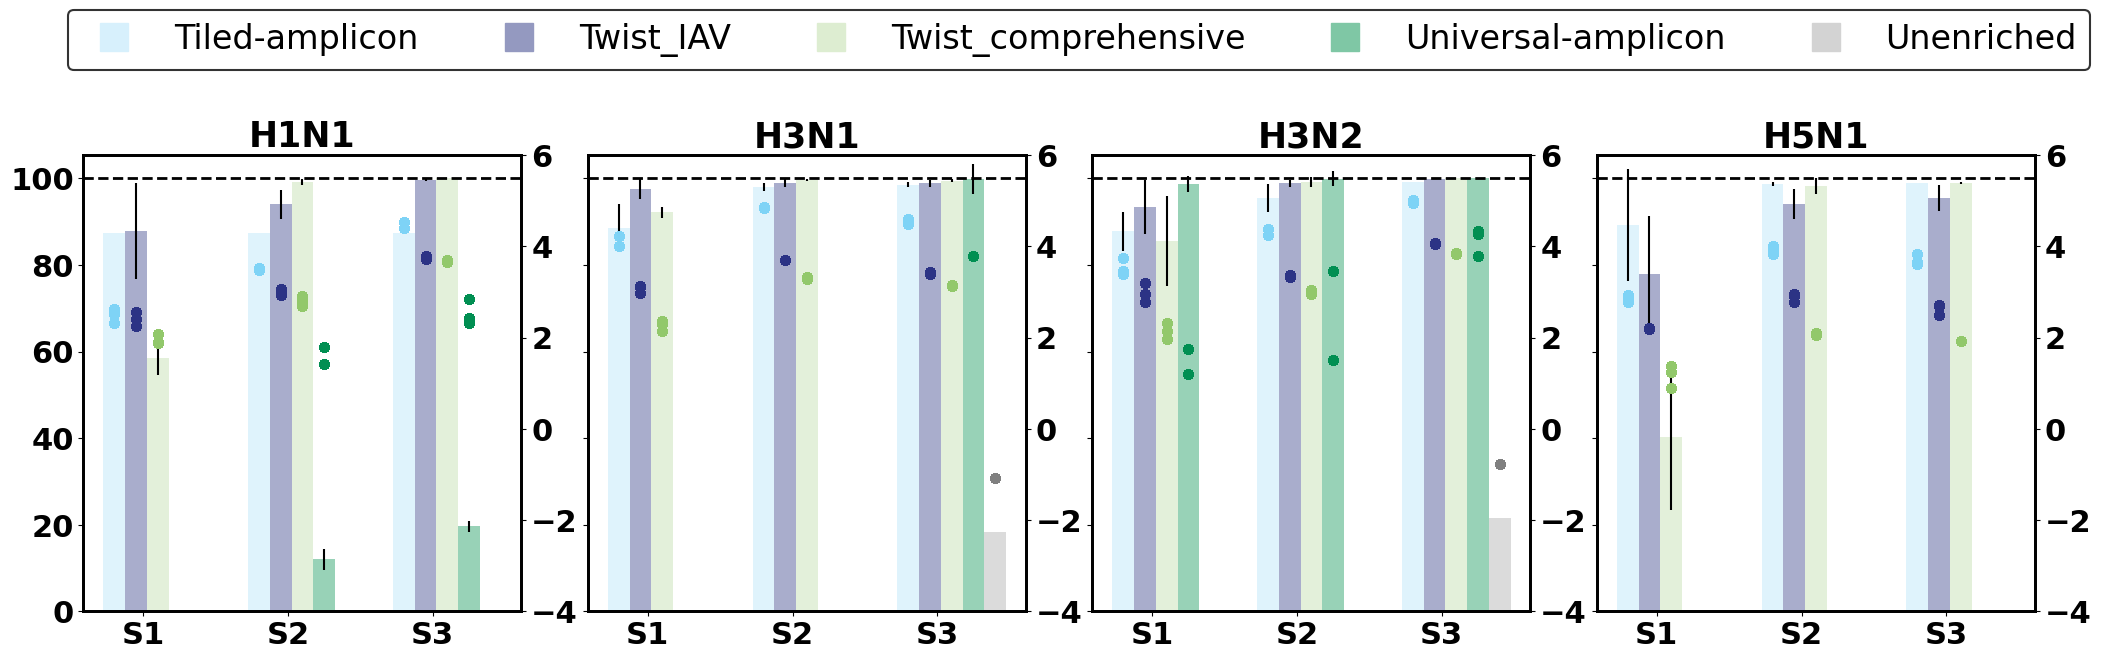

In [ ]:
# Set up the figure and axes for a 1x4 grid
fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, strain in enumerate(strains):
    ax = axes[i]

    # Filter the data for the current strain
    strain_data = summary_DM_HA[summary_DM_HA['strain'] == strain]
    strain_data_DM = DM_HA[DM_HA['strain'] == strain]

    # Convert 'sample_id' to categorical
    strain_data.loc[:, 'sample_id_cat'] = pd.Categorical(strain_data['sample_id'])
    strain_data_DM.loc[:, 'sample_id_cat'] = pd.Categorical(strain_data_DM['sample_id'])

    # Plot bar chart
    for j, method in enumerate(sequencing_methods):
        method_data = strain_data[strain_data['sequencing_method'] == method]
        ax.bar(method_data['sample_id_cat'].cat.codes + j * 0.15,
               method_data['mean_coverage'],
               yerr=method_data['std_coverage'],
               color=bar_colors[j], alpha=0.8, width=0.15)

    # Add secondary y-axis for RPKM
    ax2 = ax.twinx()
    for j, method in enumerate(sequencing_methods):
        method_data_DM = strain_data_DM[strain_data_DM['sequencing_method'] == method]
        log_rpkm = np.log10(method_data_DM['mapped_rpkm_undedupe'])
        ax2.scatter(method_data_DM['sample_id_cat'].cat.codes + j * 0.15,
                    log_rpkm,
                    color=dot_colors[j], alpha=0.8, s=40)

    # Formatting
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax2.set_ylabel('')

    ax.set_ylim(min_coverage, max_coverage * 1.02)
    ax2.set_ylim(-4, 6)

    ax.set_xticks([0.2, 1.2, 2.2])
    ax.set_xticklabels(sample_ids)
    ax.axhline(y=100, color='black', linestyle='--', linewidth=2)
    #ax2.axhline(y=0, color='red', linestyle='--', linewidth=1)

    ax.set_title(f"{strain}", fontsize=25, fontweight='bold')
    for label in ax.get_xticklabels():
      label.set_fontsize(22)
      label.set_fontweight('bold')

    for label in ax.get_yticklabels():
      label.set_fontsize(22)
      label.set_fontweight('bold')

    for label in ax2.get_yticklabels():
      label.set_fontsize(22)
      label.set_fontweight('bold')

    # Add black edge to subplot (main and twin axes)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    for spine in ax2.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.85, right=0.85, hspace=0.3)

# Legend handles
handles_combined = []
labels_combined = []

for method, colors in method_to_colors.items():
    bar_color = colors['bar']
    dot_color = colors['dot']
    bar_handle = plt.Line2D([0], [0], color=bar_color, lw=6, marker='s', markersize=20, linestyle='None')
    handles_combined.append(bar_handle)
    labels_combined.append(f"{method}")

# Legend with bold font and black border
legend = fig.legend(handles=handles_combined, labels=labels_combined,
                    loc='upper right', bbox_to_anchor=(0.88, 1.12),
                    fontsize=24, ncol=5, frameon=True)

# Set legend border color and width
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)

# Save and show
plt.savefig('/content/drive/My Drive/UC Berkeley/IAV_seq_results/Figures/plot1b_updated.png', dpi=300, bbox_inches='tight')
plt.show()


## **Figure 1b and 1e: HA segment and all 8 segment coverage depth across the genome**

In [ ]:
DM_depth = calculated_final[calculated_final.sample_id.isin(['S1', 'S2', 'S3'])].copy() # drop S4, which was spiked with a different H5N1 genome
DM_depth["segment"] = DM_depth["segment"].astype(str)
DM_depth['segment'] = DM_depth['segment'].astype('category')
DM_depth["segment"] = DM_depth["segment"].replace("nan", "NA")
# Step 1: Replace zeros and negatives to avoid log10 issues
DM_depth['log_DP_rpkm_undedupe'] = DM_depth['DP_rpkm_undedupe'].copy()
DM_depth.loc[DM_depth['DP_rpkm_undedupe'] == 0, 'log_DP_rpkm_undedupe'] = np.nan  # Replace zero coverage with NaN

# Step 2: Apply log10 transformation only to valid (positive) values
DM_depth['log_DP_rpkm_undedupe'] = np.log10(DM_depth['log_DP_rpkm_undedupe'])

# Step 3: Replace NaNs with zero for plotting
#DM_depth['log_DP_rpkm_dedup_paired'] = DM_depth['log_DP_rpkm_dedup_paired'].fillna(0)

# Step 4: Ensure all required columns are numeric
DM_depth['POSITION'] = pd.to_numeric(DM_depth['POSITION'], errors='coerce')

# check: Universal-amplicon, does those unplotted position is zero coverage (shouldn't have zero values)
check=DM_depth[(DM_depth['log_DP_rpkm_undedupe']==0)&(DM_depth['sequencing_method']=='Universal-amplicon')]


/tmp/ipython-input-10-2460816113.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.


In [ ]:
# Define the desired order of segments
segment_order = ['PB2', 'PB1', 'PA', 'HA', 'NP', 'NA', 'MP', 'NS']

# Convert the 'segment' column to a categorical variable with the specified order
DM_depth['segment'] = pd.Categorical(DM_depth['segment'], categories=segment_order, ordered=True)

# HA specific coverage depth across all methods in sample S3
DM_depth_HA=DM_depth[DM_depth.segment=='HA']
summary_DM_depth_HA=DM_depth_HA.groupby(['sample_id','sequencing_method','strain','POSITION'])['log_DP_rpkm_undedupe'].mean().reset_index()
summary_DM_depth_HA_S3=summary_DM_depth_HA[summary_DM_depth_HA.sample_id=='S3']
summary_DM_depth_HA_S3.to_csv("/content/drive/My Drive/UC Berkeley/IAV_seq_results/Figure1c.csv")
# calculate the depth of 8 segments for two Twist methods in sample S1
DM_Twist = DM_depth[(DM_depth.sequencing_method.isin(['Twist_comprehensive', 'Twist_IAV','Universal-amplicon','unenriched']))]
DM_Twist_S3 = DM_Twist[(DM_Twist.sample_id.isin(['S3']))]
DM_Twist_S1 = DM_Twist[(DM_Twist.sample_id.isin(['S1']))]
summary_DM_Twist_S3=DM_Twist_S3.groupby(['segment','sequencing_method','strain','POSITION'])['log_DP_rpkm_undedupe'].mean().reset_index()
summary_DM_Twist_S1=DM_Twist_S1.groupby(['segment','sequencing_method','strain','POSITION'])['log_DP_rpkm_undedupe'].mean().reset_index()
summary_2_Twist_S3 = (DM_Twist_S3.groupby(['segment', 'sequencing_method', 'strain'])[['log_DP_rpkm_undedupe', 'coverage']].agg(
        log_DP_rpkm_mean=('log_DP_rpkm_undedupe', 'mean'),
        log_DP_rpkm_std=('log_DP_rpkm_undedupe', 'std'),
        coverage_mean=('coverage', 'mean'),
        coverage_std=('coverage', 'std')).reset_index())
summary_2_DM_depth = (DM_depth.groupby(['segment', 'sequencing_method', 'strain','sample_id'])[['log_DP_rpkm_undedupe', 'coverage']].agg(
        log_DP_rpkm_mean=('log_DP_rpkm_undedupe', 'mean'),
        log_DP_rpkm_std=('log_DP_rpkm_undedupe', 'std'),
        coverage_mean=('coverage', 'mean'),
        coverage_std=('coverage', 'std')).reset_index())
summary_2_Twist_S1 = (DM_Twist_S1.groupby(['segment', 'sequencing_method', 'strain'])[['log_DP_rpkm_undedupe', 'coverage']].agg(
        log_DP_rpkm_mean=('log_DP_rpkm_undedupe', 'mean'),
        log_DP_rpkm_std=('log_DP_rpkm_undedupe', 'std'),
        coverage_mean=('coverage', 'mean'),
        coverage_std=('coverage', 'std')).reset_index())
summary_3_Twist_S1 = (DM_Twist_S1.groupby(['segment', 'sequencing_method', 'strain','sample_name'])[['log_DP_rpkm_undedupe', 'coverage']].agg(
        log_DP_rpkm_mean=('log_DP_rpkm_undedupe', 'mean'),
        log_DP_rpkm_std=('log_DP_rpkm_undedupe', 'std'),
        coverage_mean=('coverage', 'mean'),
        coverage_std=('coverage', 'std')).reset_index())
#summary_DM_Twist_S3.head()
#DM_Twist_S3 = DM_Twist_S3[['POSITION', 'sample_id','strain','sequencing_method','segment','coverage','log_DP_rpkm_dedup_paired']]
#DM_Twist_S3.head()
#summary_2_Twist_S3.head(10)
#print(DM_Twist_S3['segment'].unique())
summary_DM_Twist_S1['sample_id']="S1"
summary_DM_Twist_S3['sample_id']="S3"
summary_DM_Twist_S1_S3=pd.concat([summary_DM_Twist_S1,summary_DM_Twist_S3])
summary_2_Twist_S1['sample_id']="S1"
summary_2_Twist_S3['sample_id']="S3"
summary_2_Twist_S1_S3=pd.concat([summary_2_Twist_S1,summary_2_Twist_S3])
print(DM_Twist_S1['sample_name'].unique())
summary_3_Twist_S1 = summary_3_Twist_S1.dropna(subset=['coverage_mean'])
#summary_3_Twist_S1.head(20)

/tmp/ipython-input-13-3647750204.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/tmp/ipython-input-13-3647750204.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/tmp/ipython-input-13-3647750204.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/tmp/ipython-input-13-3647750204.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=

['S1_31' 'S1_32' 'S1_33' 'S1_10' 'S1_11' 'S1_12' 'S1_1' 'S1_2' 'S1_3']


### **Figure 1e: 8 segments comparison between Twist IAV and comprehensive**

In [ ]:
summary_2_DM_depth.to_csv("/content/drive/My Drive/UC Berkeley/IAV_seq_results/TableS1.csv")
DM_depth.head()

Unnamed: 0 sample_name sample_id library_id WW_method strain  \
0     1521784       S1_31        S1         31        DM   H1N1   
1     1521785       S1_31        S1         31        DM   H1N1   
2     1521786       S1_31        S1         31        DM   H1N1   
3     1521787       S1_31        S1         31        DM   H1N1   
4     1521788       S1_31        S1         31        DM   H1N1   

   dPCR_postFreeze_thaw_gc_ul   sequencing_method segment  coverage  ...  \
0                       5.352  Universal-amplicon      HA       0.0  ...   
1                       5.352  Universal-amplicon      MP       0.0  ...   
2                       5.352  Universal-amplicon      NA       0.0  ...   
3                       5.352  Universal-amplicon      NP       0.0  ...   
4                       5.352  Universal-amplicon      NS       0.0  ...   

   POSITION  COVERAGE  method  segment_number  mapped_rpkm_raw  \
0       NaN       NaN     NaN             NaN              0.0   
1       NaN       NaN     NaN             NaN              0.0   
2       NaN       NaN     NaN             NaN              0.0   
3       NaN       NaN     NaN             NaN              0.0   
4       NaN       NaN     NaN             NaN              0.0   

   mapped_rpkm_undedupe  DP_rpkm_raw  DP_rpkm_undedupe  gene copies  \
0                   0.0          NaN               NaN        26.76   
1                   0.0          NaN               NaN        26.76   
2                   0.0          NaN               NaN        26.76   
3                   0.0          NaN               NaN        26.76   
4                   0.0          NaN               NaN        26.76   

  log_DP_rpkm_undedupe  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 30 columns]

/tmp/ipython-input-15-1932930682.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



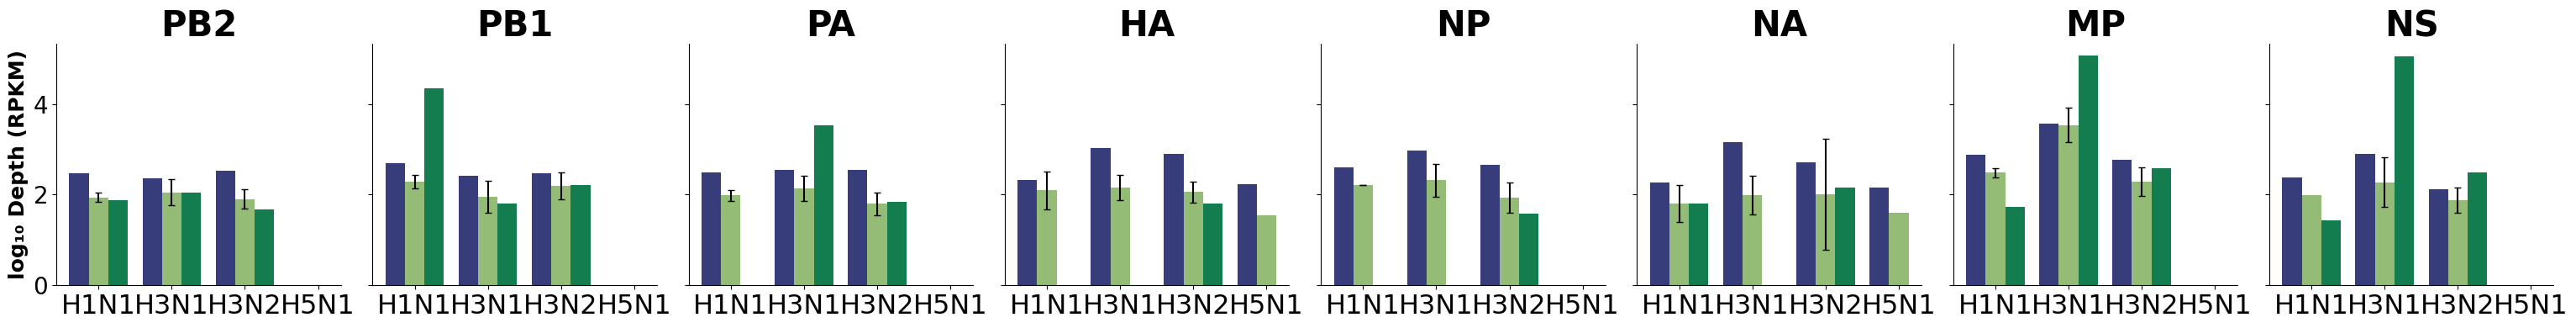

In [ ]:
# Define custom colors for sequencing methods
dot_colors_Twist = ['#2c3385', '#92c86b','#018f52','#808080']
palette = dict(zip(summary_2_Twist_S3['sequencing_method'].unique(), dot_colors_Twist))

# Create a bar plot for each segment
g = sns.catplot(
    data=summary_2_Twist_S1,
    kind='bar',
    x='strain',
    y='log_DP_rpkm_mean',
    hue='sequencing_method',
    col='segment',
    palette=palette,
    ci=None,
    height=4,
    aspect=0.9
)
# Add error bars
for ax, segment in zip(g.axes.flat, summary_2_Twist_S3['segment'].unique()):
    subset = summary_2_Twist_S3[summary_2_Twist_S3['segment'] == segment]

    # Create a lookup dict from (strain, method) → std
    std_lookup = subset.set_index(['strain', 'sequencing_method'])['log_DP_rpkm_std'].to_dict()

    patches = ax.patches
    for bar in patches:
        # Extract strain and method from bar
        strain = bar.get_x() + bar.get_width() / 2
        height = bar.get_height()

        # Get x tick labels and width mapping
        xticks = [tick.get_text() for tick in ax.get_xticklabels()]
        xticklocs = ax.get_xticks()

        # Figure out which strain this bar belongs to
        for i, x in enumerate(xticklocs):
            if abs(strain - x) < bar.get_width():  # match bar to tick
                strain_name = xticks[i]
                break
        else:
            continue  # no match, skip

        # Determine method based on patch order
        method_index = patches.index(bar) % len(dot_colors_Twist)
        method = summary_2_Twist_S3['sequencing_method'].unique()[method_index]

        # Get std
        err = std_lookup.get((strain_name, method), 0)

        ax.errorbar(
            bar.get_x() + bar.get_width() / 2,
            height,
            yerr=err,
            fmt='none',
            c='black',
            capsize=3
        )

    # Enhance axis label clarity
    ax.tick_params(axis='x', labelsize=23)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel("", fontsize=1, fontweight='bold')
    ax.set_ylabel("log₁₀ Depth (RPKM)", fontsize=18, fontweight='bold')


# Set column titles
g.set_titles("{col_name}", size=30, weight='bold')
# Remove the default legend
g._legend.remove()


# Clean up figure appearance
g.despine()

# Final layout adjustment
plt.tight_layout()
plt.show()


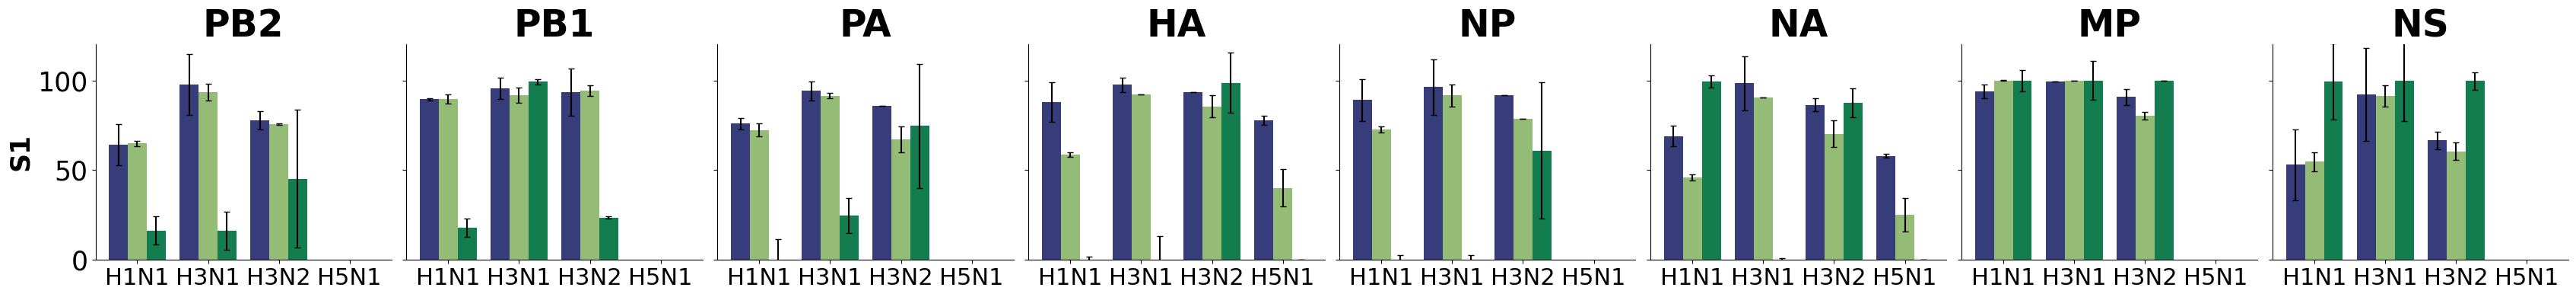

In [ ]:

g = sns.catplot(
    data=summary_2_Twist_S1,
    kind='bar',
    x='strain',                 # x-axis: strain
    y='coverage_mean',          # y-axis: coverage breadth
    hue='sequencing_method',
    col='segment',
    col_wrap=8,
    palette=palette,
    errorbar=None,
    height=4,
    aspect=1
)

for ax, segment in zip(g.axes.flat, summary_2_Twist_S1['segment'].unique()):
    subset = summary_2_Twist_S1[summary_2_Twist_S1['segment'] == segment]
    subset = subset.sort_values(['strain', 'sequencing_method'])

    patches = ax.patches
    for bar, (_, row) in zip(patches, subset.iterrows()):
        bar_x_center = bar.get_x() + bar.get_width() / 2
        bar_height = bar.get_height()

        strain_name = row['strain']
        method = row['sequencing_method']
        err = row['coverage_std']

        ax.errorbar(
            bar_x_center,
            bar_height,
            yerr=err,
            fmt='none',
            c='black',
            capsize=3
        )

    # Axis styling
    ax.tick_params(axis='x', labelsize=22)
    ax.tick_params(axis='y', labelsize=25)
    ax.set_ylim(bottom=0)
    ax.set_xlabel("")
    #ax.set_xlabel("Strain", fontsize=25, fontweight='bold')
    ax.set_ylabel("S1", fontsize=25, fontweight='bold')
    ax.set_title(segment, fontsize=35, fontweight='bold')

# Legend
g._legend.remove()

# Clean and finalize
g.despine()
plt.tight_layout()
plt.savefig("/content/drive/My Drive/UC Berkeley/IAV_seq_results/Figures/FigureS1_b.png", dpi=300, bbox_inches='tight')
plt.show()


### **Figure 1b HA segment coverage depth across genome**

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 15 x 3.4 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: /content/drive/My Drive/UC Berkeley/IAV_seq_results/Figures/plot1c_updated.png
/usr/local/lib/python3.11/dist-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 46 rows containing missing values.
/usr/local/lib/python3.11/dist-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 46 rows containing missing values.


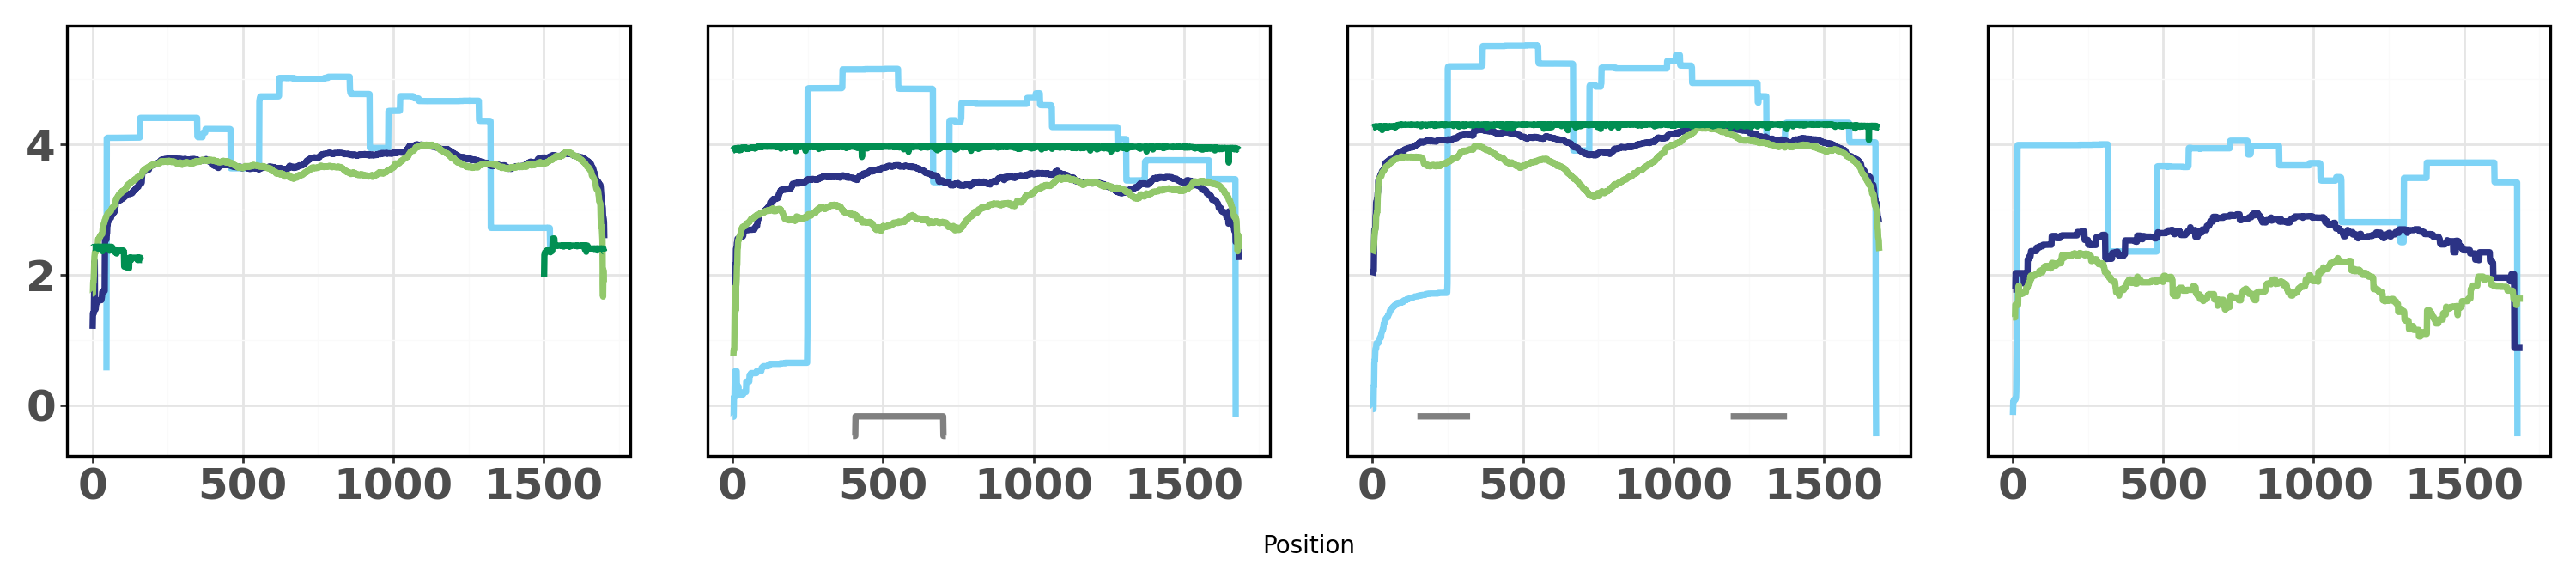

In [ ]:
plot1c_line = (
    ggplot(summary_DM_depth_HA_S3, aes(x='POSITION', y='log_DP_rpkm_undedupe', color='sequencing_method')) +
    geom_line(size=1.5) +
    facet_grid(' sample_id~ strain') +
    labs(
        x='Position',
        y='HA segment \ncoverage depth/Gb'
    ) +
    scale_color_manual(values=dot_colors) +
    theme_bw() +
    theme(
        figure_size=(15, 3.4),
        axis_title_x=element_text(size=10),
        axis_text_x=element_text(size=18,weight='bold'),
        legend_position='none',
        strip_text=element_blank(),
        axis_title_y=element_blank(),
        axis_text_y=element_text(size=18,weight='bold'),
        #strip_text=element_text(size=10),
        legend_text=element_text(size=18),
        legend_title=element_text(size=12),
         panel_spacing=0.03,
        panel_border=element_rect(color="black", size=1.2)
    )
)

plot1c_line += guides(
    color=guide_legend(ncol=5, override_aes={'size': 4})  # Adjust legend formatting
)

plot1c_line.save("/content/drive/My Drive/UC Berkeley/IAV_seq_results/Figures/plot1c_updated.png", dpi=300)
display(plot1c_line)

/usr/local/lib/python3.11/dist-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 8294 rows containing missing values.


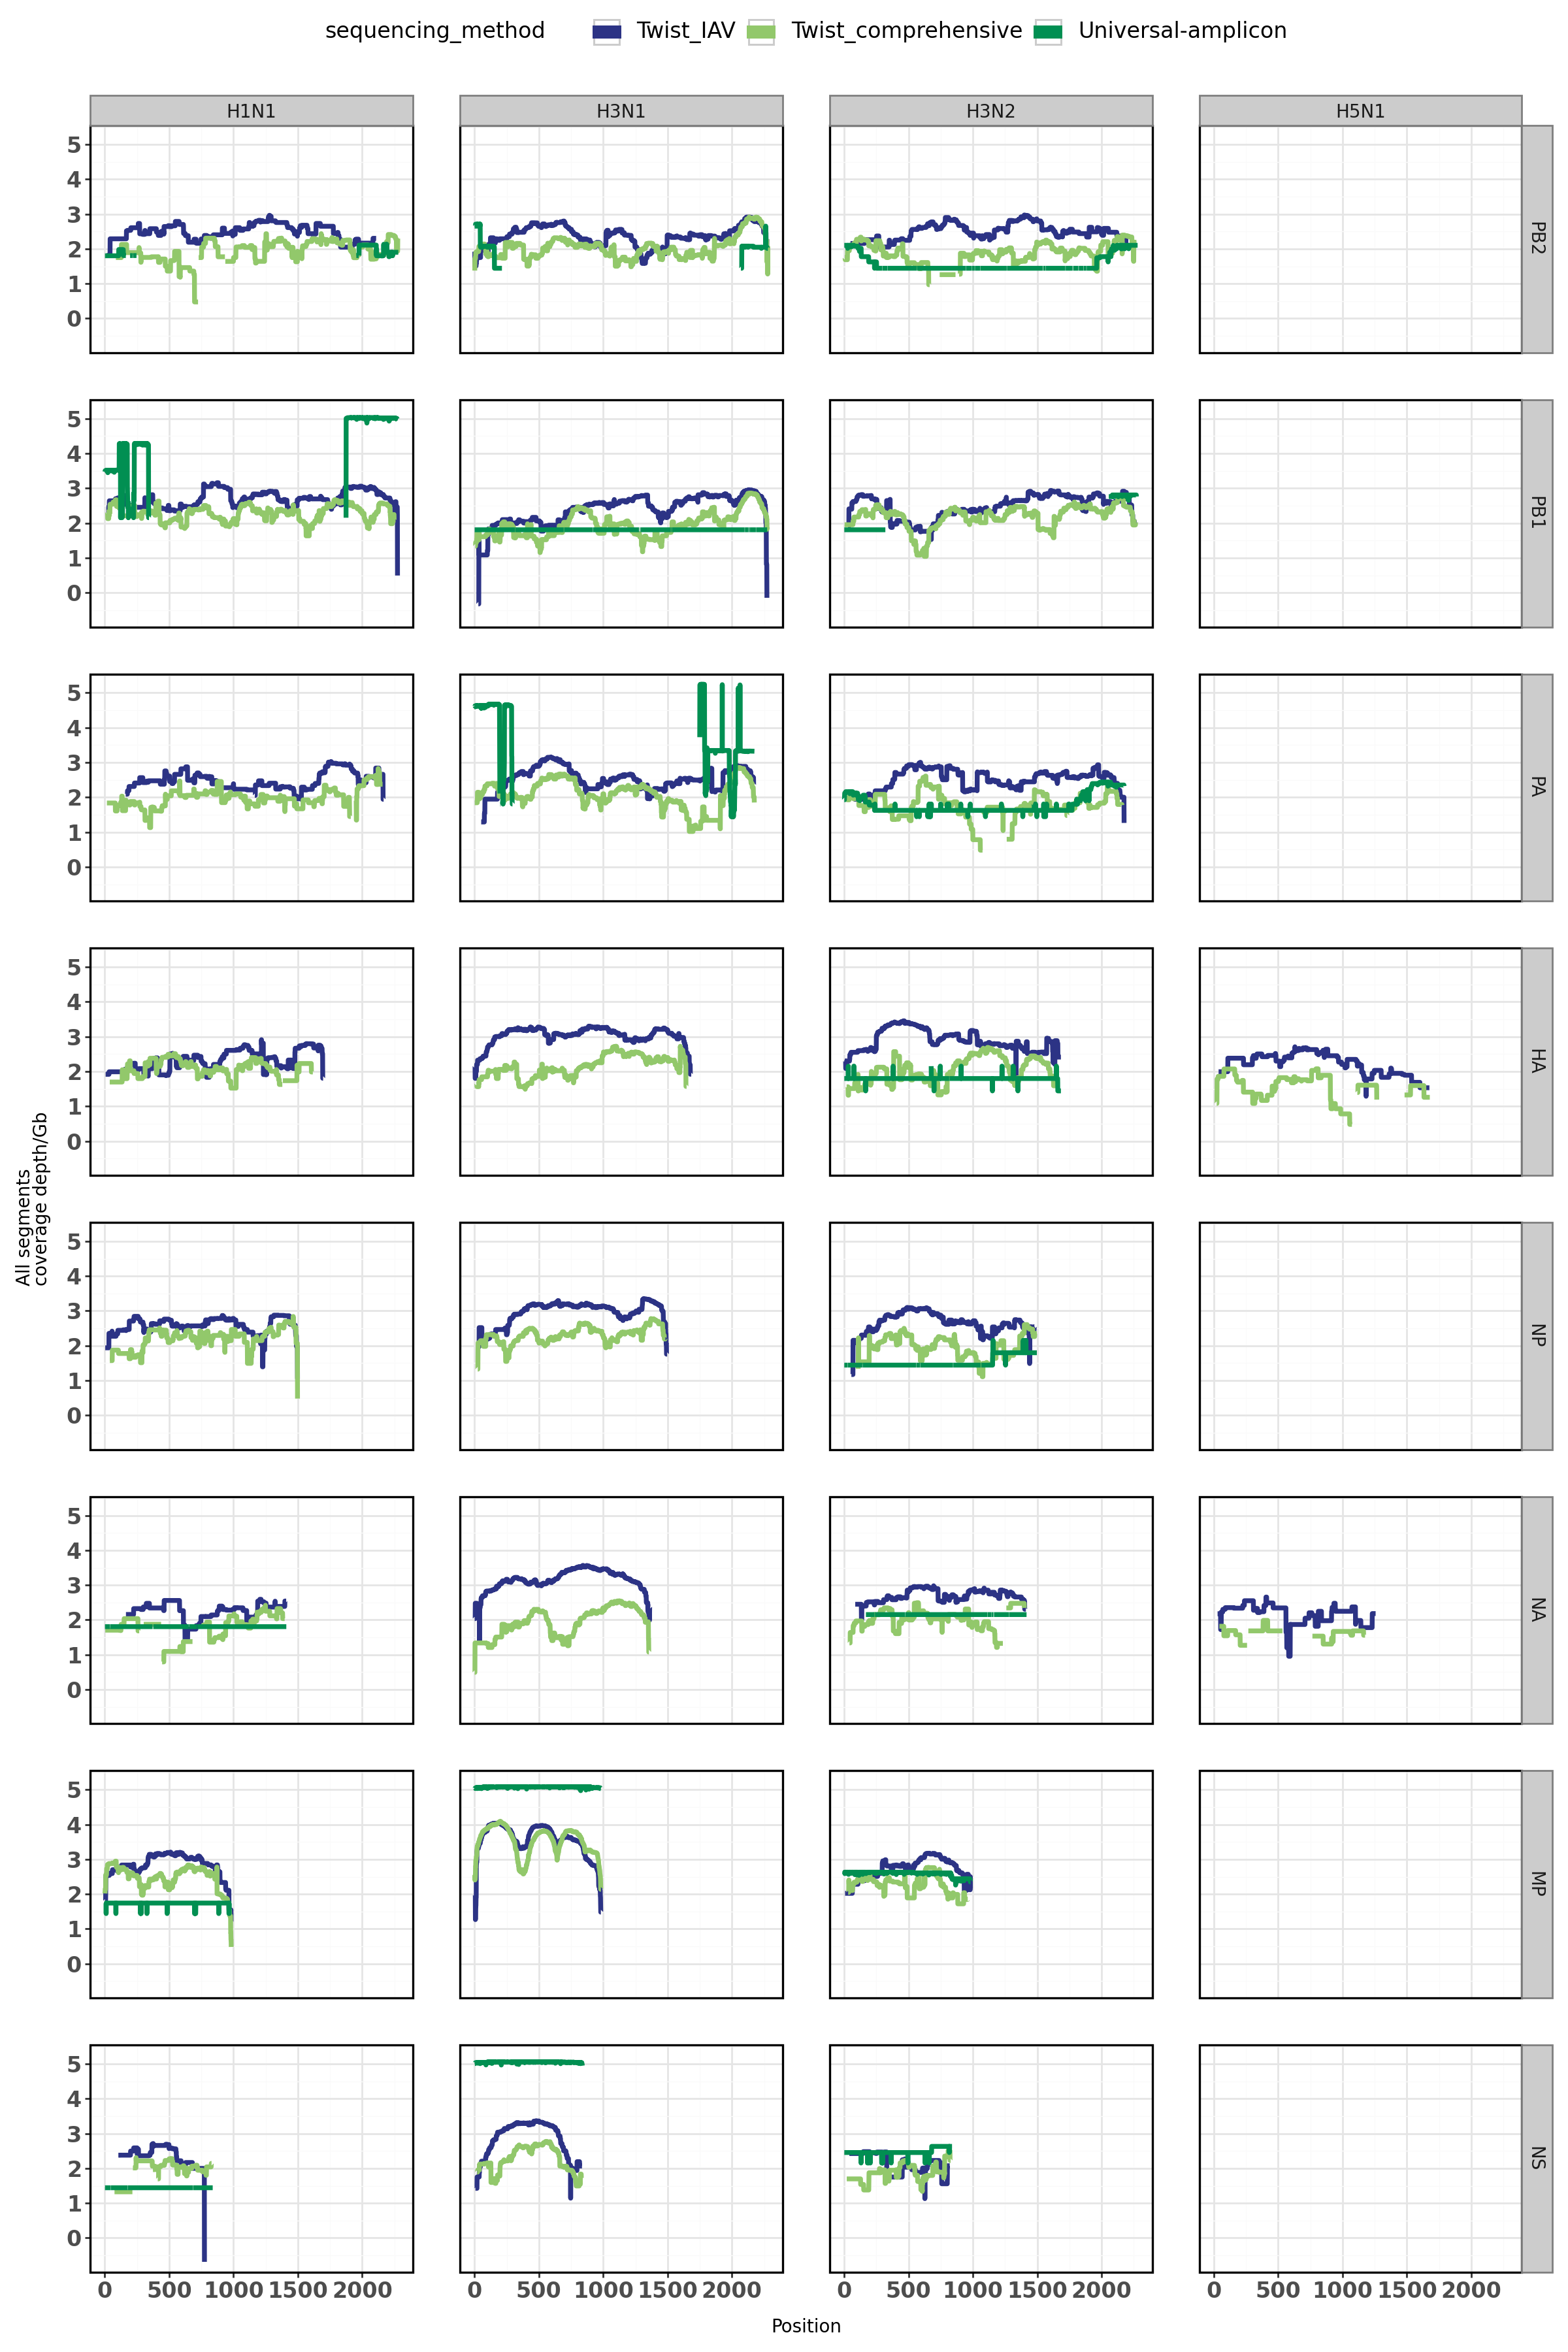

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 12 x 18 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: /content/drive/My Drive/UC Berkeley/IAV_seq_results/Figures/FigureS1_a.png
/usr/local/lib/python3.11/dist-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 8294 rows containing missing values.


In [ ]:
plot1c_line = (
    ggplot(summary_DM_Twist_S1, aes(x='POSITION', y='log_DP_rpkm_undedupe', color='sequencing_method')) +
    geom_line(size=1.5) +
    facet_grid('segment~strain') +
    labs(
        x='Position',
        y='All segments \ncoverage depth/Gb'
    ) +
    scale_color_manual(values=dot_colors_Twist) +
    theme_bw() +
    theme(
        figure_size=(12, 18),
        axis_title_x=element_text(size=10),
        axis_text_x=element_text(size=12,weight='bold'),
        legend_position='top',
        strip_text=element_text(size=10),
        axis_title_y=element_text(size=10),
        axis_text_y=element_text(size=12,weight='bold'),
        #strip_text=element_text(size=10),
        legend_text=element_text(size=12),
        legend_title=element_text(size=12),
         panel_spacing=0.03,
        panel_border=element_rect(color="black", size=1.2)
    )
)

plot1c_line += guides(
    color=guide_legend(ncol=5, override_aes={'size': 4})  # Adjust legend formatting
)

display(plot1c_line)
plot1c_line.save("/content/drive/My Drive/UC Berkeley/IAV_seq_results/Figures/FigureS1_a.png", dpi=300, bbox_inches='tight')

/usr/local/lib/python3.11/dist-packages/plotnine/scales/scale_manual.py:39: PlotnineWarning: The palette of scale_color_manual can return a maximum of 2 values. 4 were requested from it.
/usr/local/lib/python3.11/dist-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 39642 rows containing missing values.
/usr/local/lib/python3.11/dist-packages/plotnine/scales/scale_manual.py:39: PlotnineWarning: The palette of scale_color_manual can return a maximum of 2 values. 4 were requested from it.


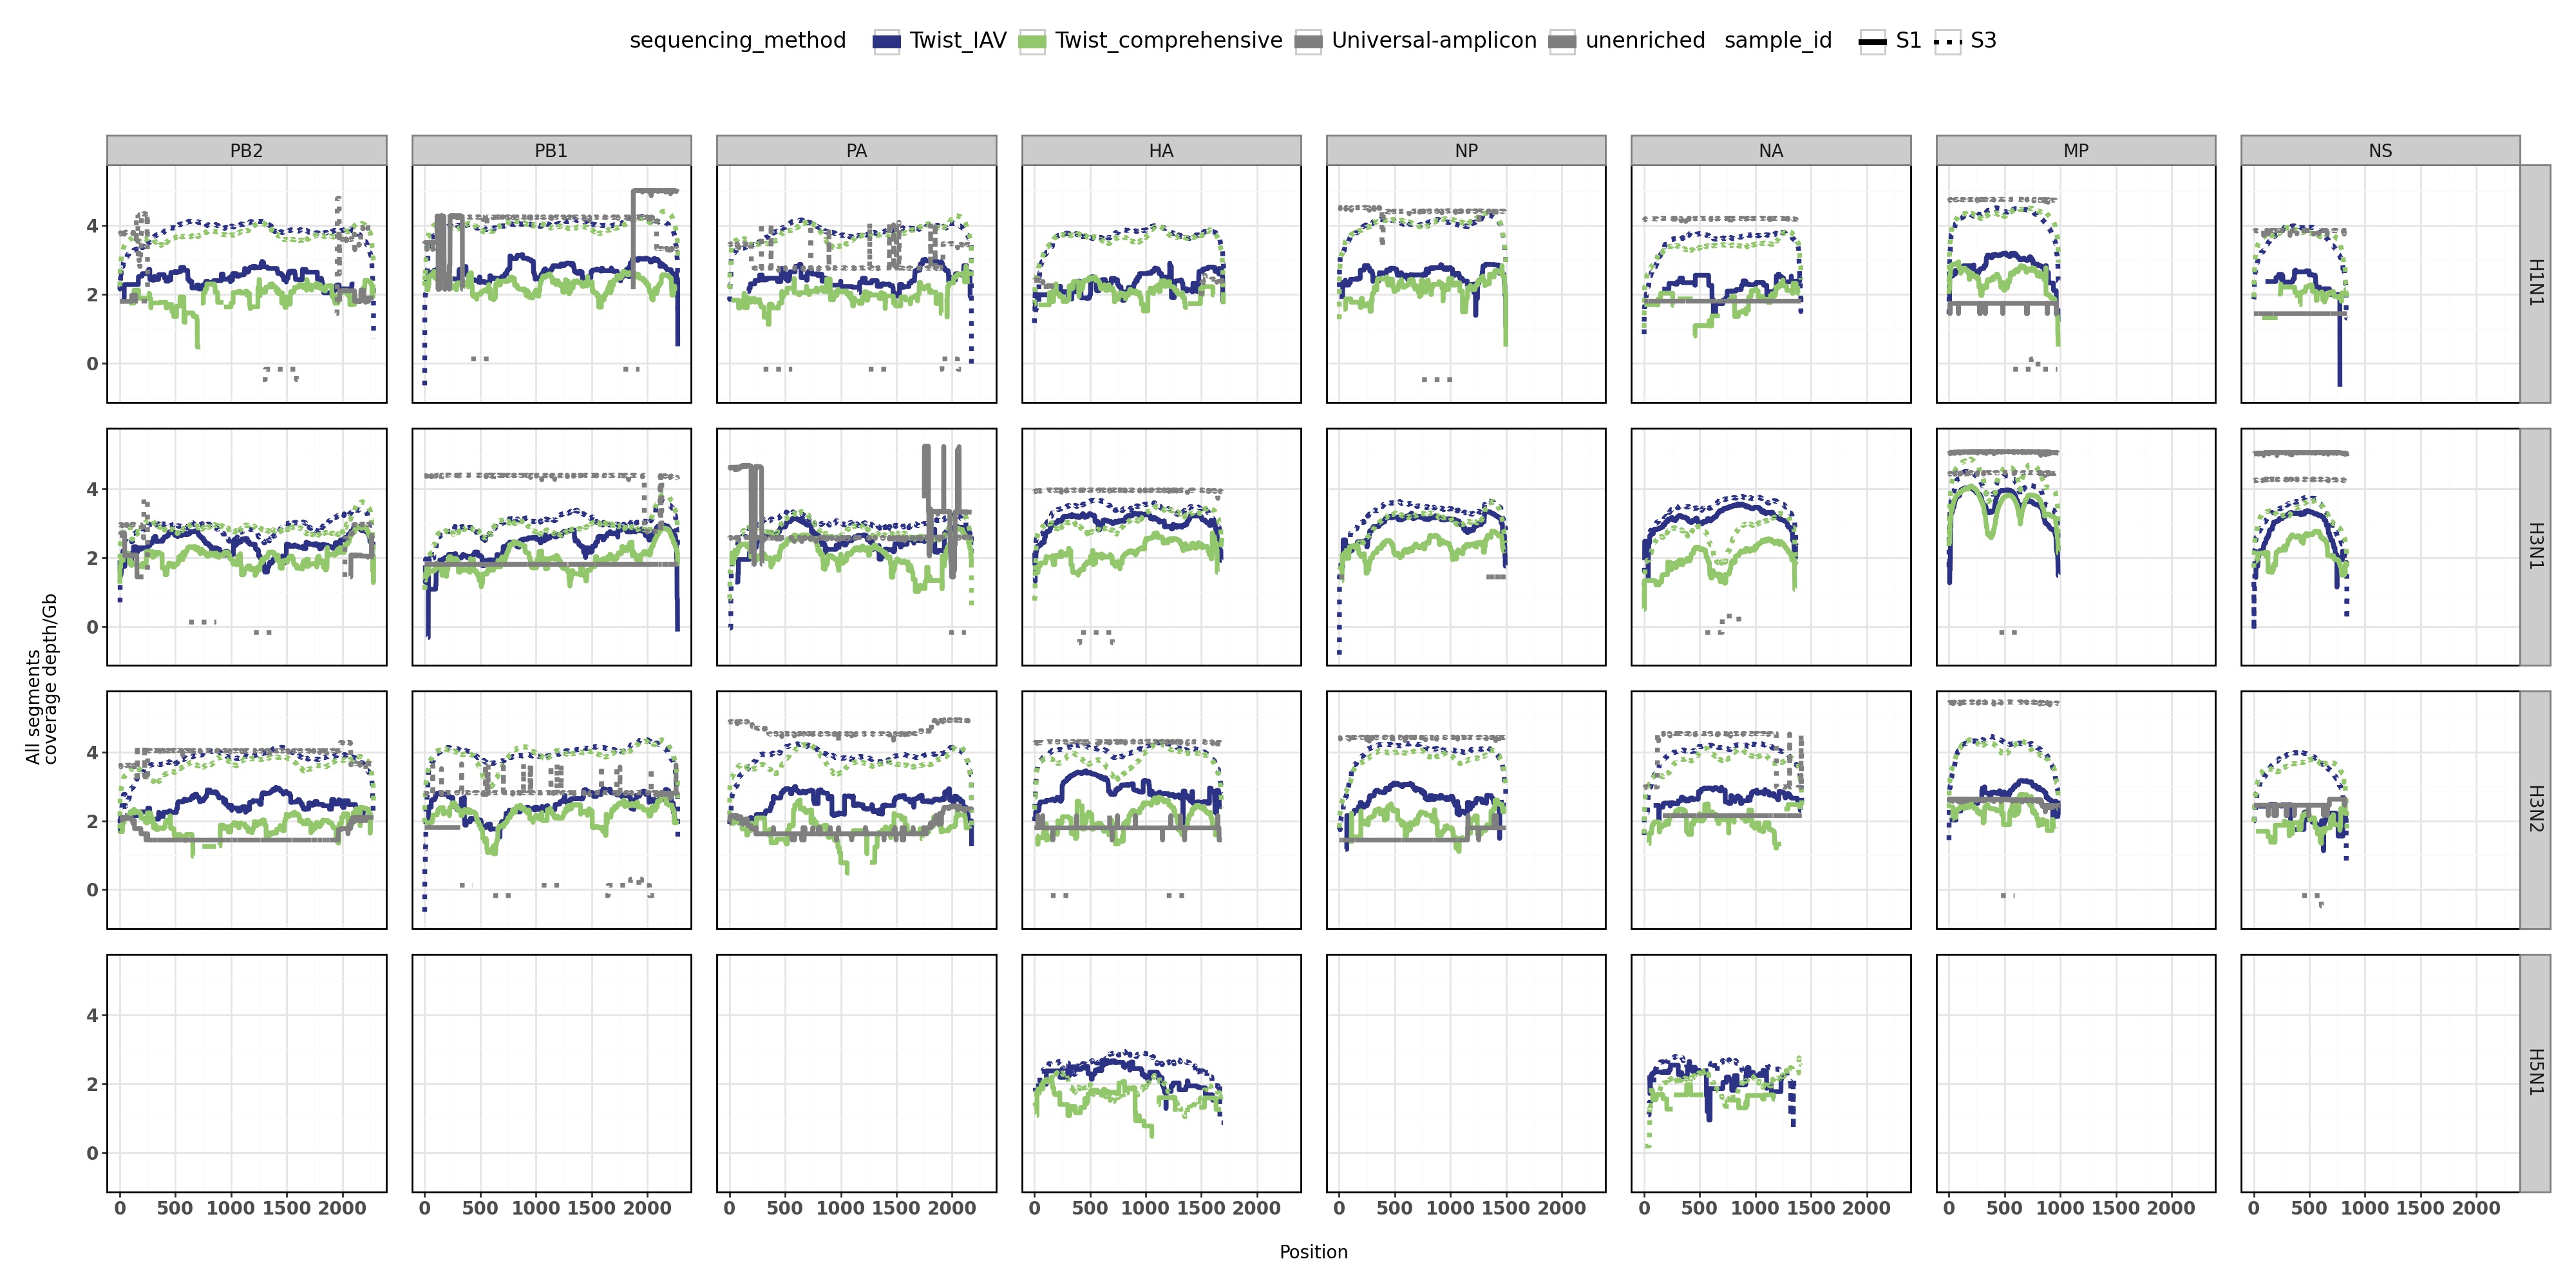

In [ ]:
dot_colors_Twist = ['#2c3385', '#92c86b']
dot_linetypes = ['solid', 'dotted']

plot1c_line = (
    ggplot(summary_DM_Twist_S1_S3, aes(x='POSITION', y='log_DP_rpkm_undedupe',
                                    color='sequencing_method', linetype='sample_id')) +
    geom_line(size=1.5) +
    facet_grid('strain~segment') +
    labs(
        x='Position',
        y='All segments \ncoverage depth/Gb'
    ) +
    scale_color_manual(values=dot_colors_Twist) +
    scale_linetype_manual(values=dot_linetypes) +
    theme_bw() +
    theme(
        figure_size=(20, 10),
        axis_title_x=element_text(size=10),
        axis_text_x=element_text(size=10, weight='bold'),
        axis_title_y=element_text(size=10),
        axis_text_y=element_text(size=10, weight='bold'),
        legend_position='top',
        legend_text=element_text(size=12),
        legend_title=element_text(size=12),
        strip_text=element_text(size=10),
        panel_spacing=0.01,
        panel_border=element_rect(color="black", size=1)
    )
)

plot1c_line += guides(
    color=guide_legend(ncol=5, override_aes={'size': 4}),
    linetype=guide_legend(ncol=5, override_aes={'size': 1.5})
)

display(plot1c_line)

## **Figure 1d Quantitative analysis of HA segment dPCR conc. and sequencing mapped reads RPKM**

In [ ]:
import scipy.stats as stats
DM_HA_dPCR = DM_HA[(DM_HA.strain != 'H5N1') & (DM_HA.sequencing_method != 'unenriched')].copy()

# list to store k and R2 values
summary_list = []

# Loop for fitting
for (strain, method), group in DM_HA_dPCR.groupby(["strain", "sequencing_method"]):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(group["gene copies"], group["mapped_rpkm_undedupe"])

    summary_list.append({
        "Strain": strain,
        "Sequencing Method": method,
        "Slope (k)": slope,
        "R²": r_value ** 2})

summary_df = pd.DataFrame(summary_list)
summary_df

Strain    Sequencing Method   Slope (k)        R²
0    H1N1       Tiled-amplicon   16.139041  0.967535
1    H1N1            Twist_IAV    0.909630  0.984881
2    H1N1  Twist_comprehensive    0.809280  0.996095
3    H1N1   Universal-amplicon         NaN       NaN
4    H3N1       Tiled-amplicon  245.186789  0.568047
5    H3N1            Twist_IAV    5.718737  0.576410
6    H3N1  Twist_comprehensive    3.263338  0.859588
7    H3N1   Universal-amplicon         NaN       NaN
8    H3N2       Tiled-amplicon   93.542399  0.985904
9    H3N2            Twist_IAV    3.508803  0.996102
10   H3N2  Twist_comprehensive    2.348374  0.998830
11   H3N2   Universal-amplicon         NaN       NaN

In [ ]:
DM_HA_dPCR_plot = DM_HA[(DM_HA.sequencing_method != 'unenriched')].copy()
DM_HA_filtered = DM_HA[(DM_HA['gene copies'] > 0) & (DM_HA['mapped_rpkm_undedupe'] > 0)].copy()
DM_noH5N1 = DM_HA_filtered[DM_HA_filtered.strain != 'H5N1']

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 10 x 6 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: /content/drive/My Drive/UC Berkeley/IAV_seq_results/Figures/plot1d_updated.png
/usr/local/lib/python3.11/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.11/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise

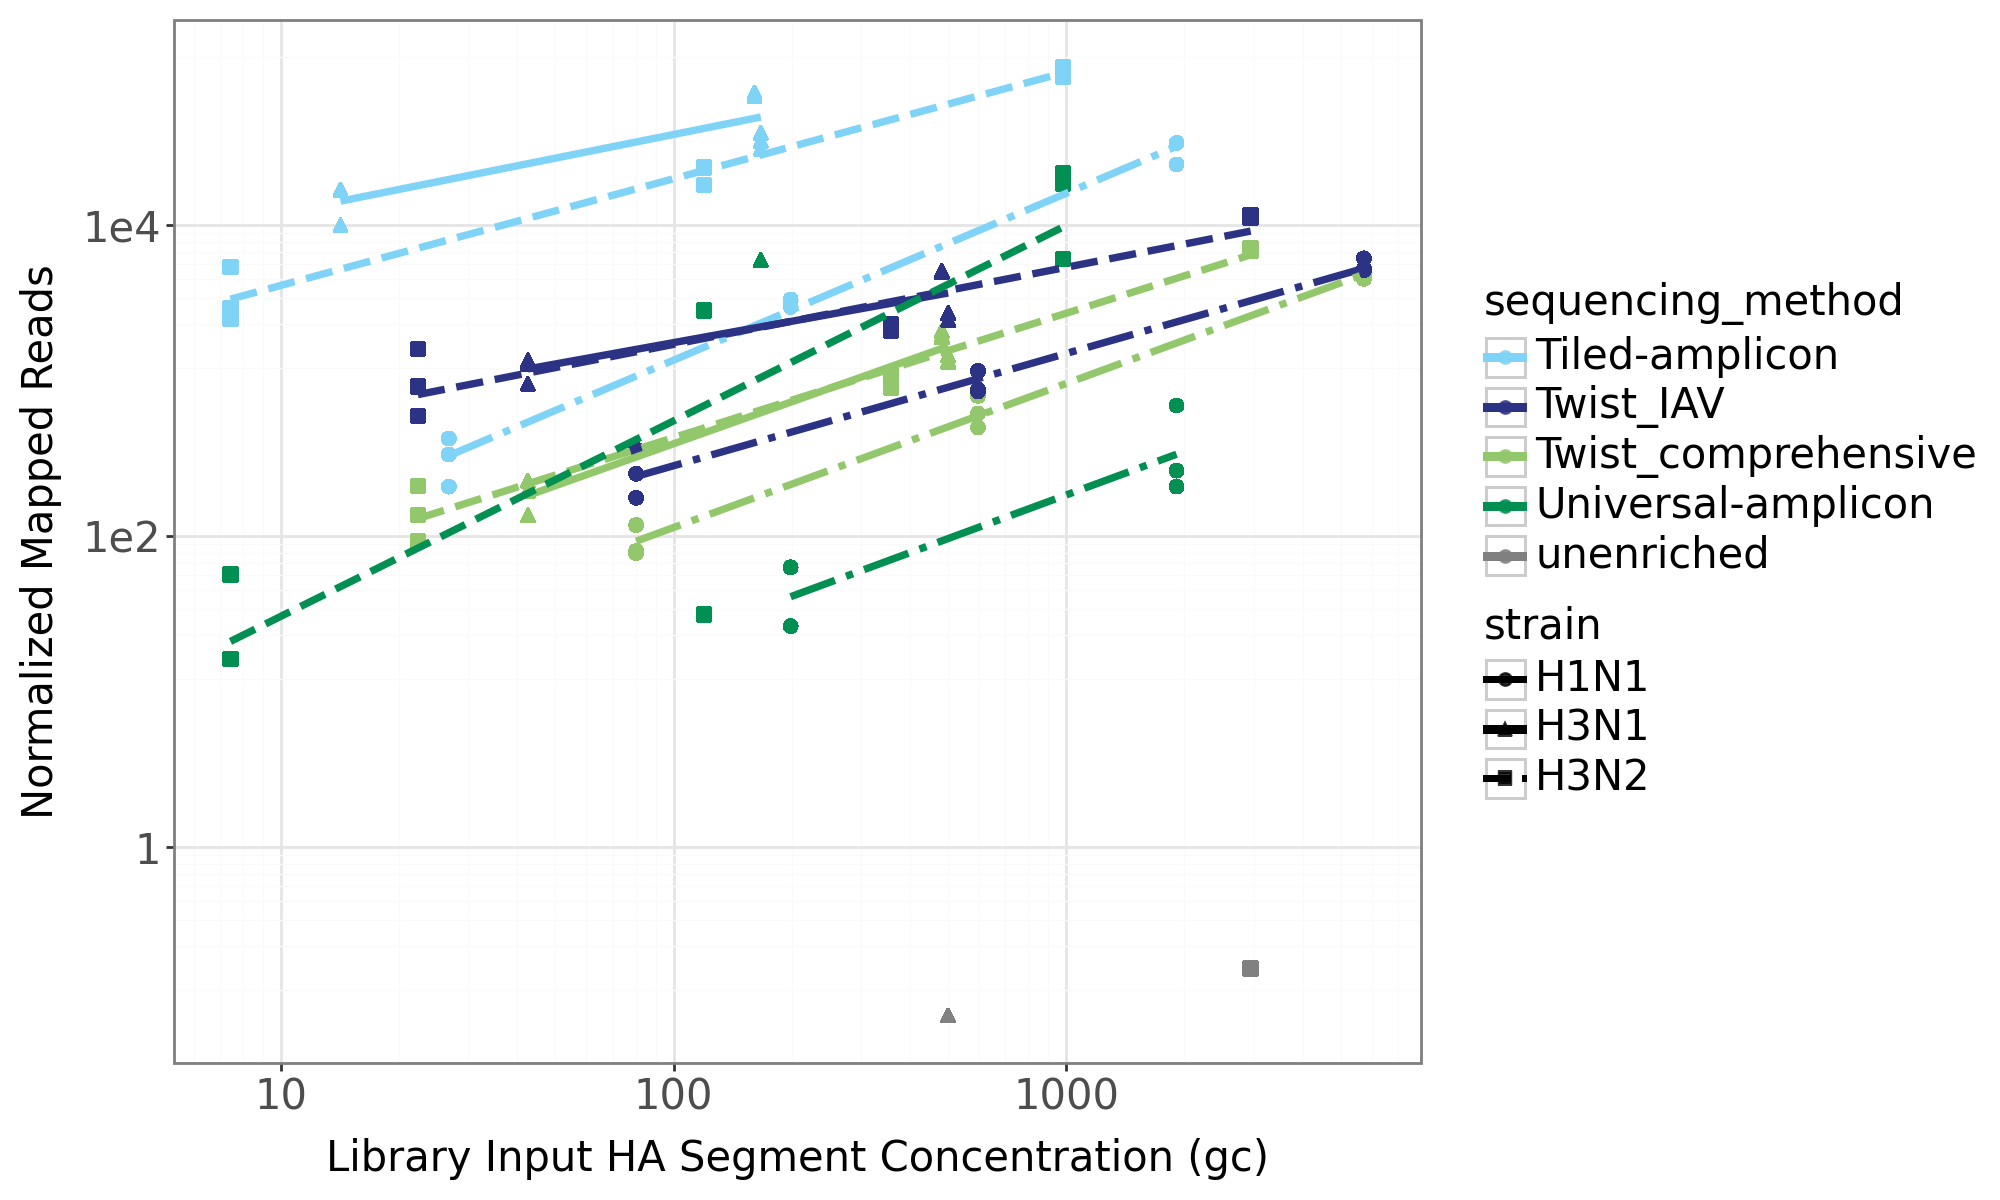

In [ ]:
DM_noH5N1.to_csv("/content/drive/My Drive/UC Berkeley/IAV_seq_results/Figure2a.csv")
plot1d = (
    ggplot(DM_noH5N1, aes(x='gene copies', y='mapped_rpkm_undedupe',
                           color='sequencing_method', shape='strain')) +
    geom_point(size=2, alpha=0.8) +

    # Linear regression lines, matching colors from bar_colors
    geom_smooth(aes(color='sequencing_method', linetype='strain'),
                method='lm', se=False, size=1.5) +

    # use the same dot_colors for points
    scale_color_manual(values=dot_colors) +
    scale_linetype_manual(values=['dashdot','solid', 'dashed']) +
    scale_y_log10() +
    scale_x_log10() +

    # Axis labels
    xlab('Library Input HA Segment Concentration (gc)') +
    ylab('Normalized Mapped Reads') +
    theme_bw() +
    theme(
        figure_size=(10, 6),
        legend_position="right",
        axis_title_x=element_text(size=15),
        axis_title_y=element_text(size=15),
        axis_text_x=element_text(size=15),
        axis_text_y=element_text(size=15),
        strip_text=element_text(size=15),
        legend_text=element_text(size=15),
        legend_title=element_text(size=15)
    )
)
plot1d.save("/content/drive/My Drive/UC Berkeley/IAV_seq_results/Figures/plot1d_updated.png", dpi=300)
display(plot1d)


In [ ]:
DM_noH5N1.head()
figure=DM_noH5N1[['sample_id','library_id','WW_method','strain','gene copies','sequencing_method','segment','mapped_rpkm_undedupe']]
figure.to_csv("/content/drive/My Drive/UC Berkeley/IAV_seq_results/Figure2a.csv")

## **Figure 1e All segment averaged coverage depth and breadth comparison**

In [ ]:
# Calculate mean and standard error
summary_DM_depth = DM_depth.groupby(
    ['segment', 'sample_id', 'sequencing_method', 'strain']
)[['log_DP_rpkm_undedupe', 'coverage']].agg(['mean', 'sem']).reset_index()

summary_DM_depth.columns = ['segment', 'sample_id', 'sequencing_method', 'strain', 'mean_log_DP_rpkm', 'se_log_DP_rpkm','mean_coverage_breadth','se_coverage_breadth']

# Define the order of segments
segment_order = ["NS", "MP", "NA", "NP", "HA", "PA", "PB1", "PB2"]

# Ensure 'NA' is treated as a string, not NaN
summary_DM_depth["segment"] = summary_DM_depth["segment"].astype(str).replace("nan", "NA")

# Convert to categorical with specified order
summary_DM_depth["segment"] = pd.Categorical(summary_DM_depth["segment"], categories=segment_order, ordered=True)
#summary_DM_depth=summary_DM_depth[(summary_DM_depth['strain']!='H5N1')&(summary_DM_depth['sequencing_method']!='Tiled-amplicon')]
#summary_DM_depth.head()
summary_DM_depth_S3=summary_DM_depth[summary_DM_depth.sample_id=='S3']
summary_DM_depth_S1=summary_DM_depth[summary_DM_depth.sample_id=='S1']
summary_DM_depth_S3.head()

/tmp/ipython-input-34-434167756.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


segment sample_id sequencing_method strain  mean_log_DP_rpkm  \
40     PB2        S3    Tiled-amplicon   H1N1               NaN   
41     PB2        S3    Tiled-amplicon   H3N1               NaN   
42     PB2        S3    Tiled-amplicon   H3N2               NaN   
43     PB2        S3    Tiled-amplicon   H5N1               NaN   
44     PB2        S3         Twist_IAV   H1N1          3.812362   

    se_log_DP_rpkm  mean_coverage_breadth  se_coverage_breadth  
40             NaN                    NaN                  NaN  
41             NaN                    NaN                  NaN  
42             NaN                    NaN                  NaN  
43             NaN                    NaN                  NaN  
44        0.003807              99.736867             0.002291

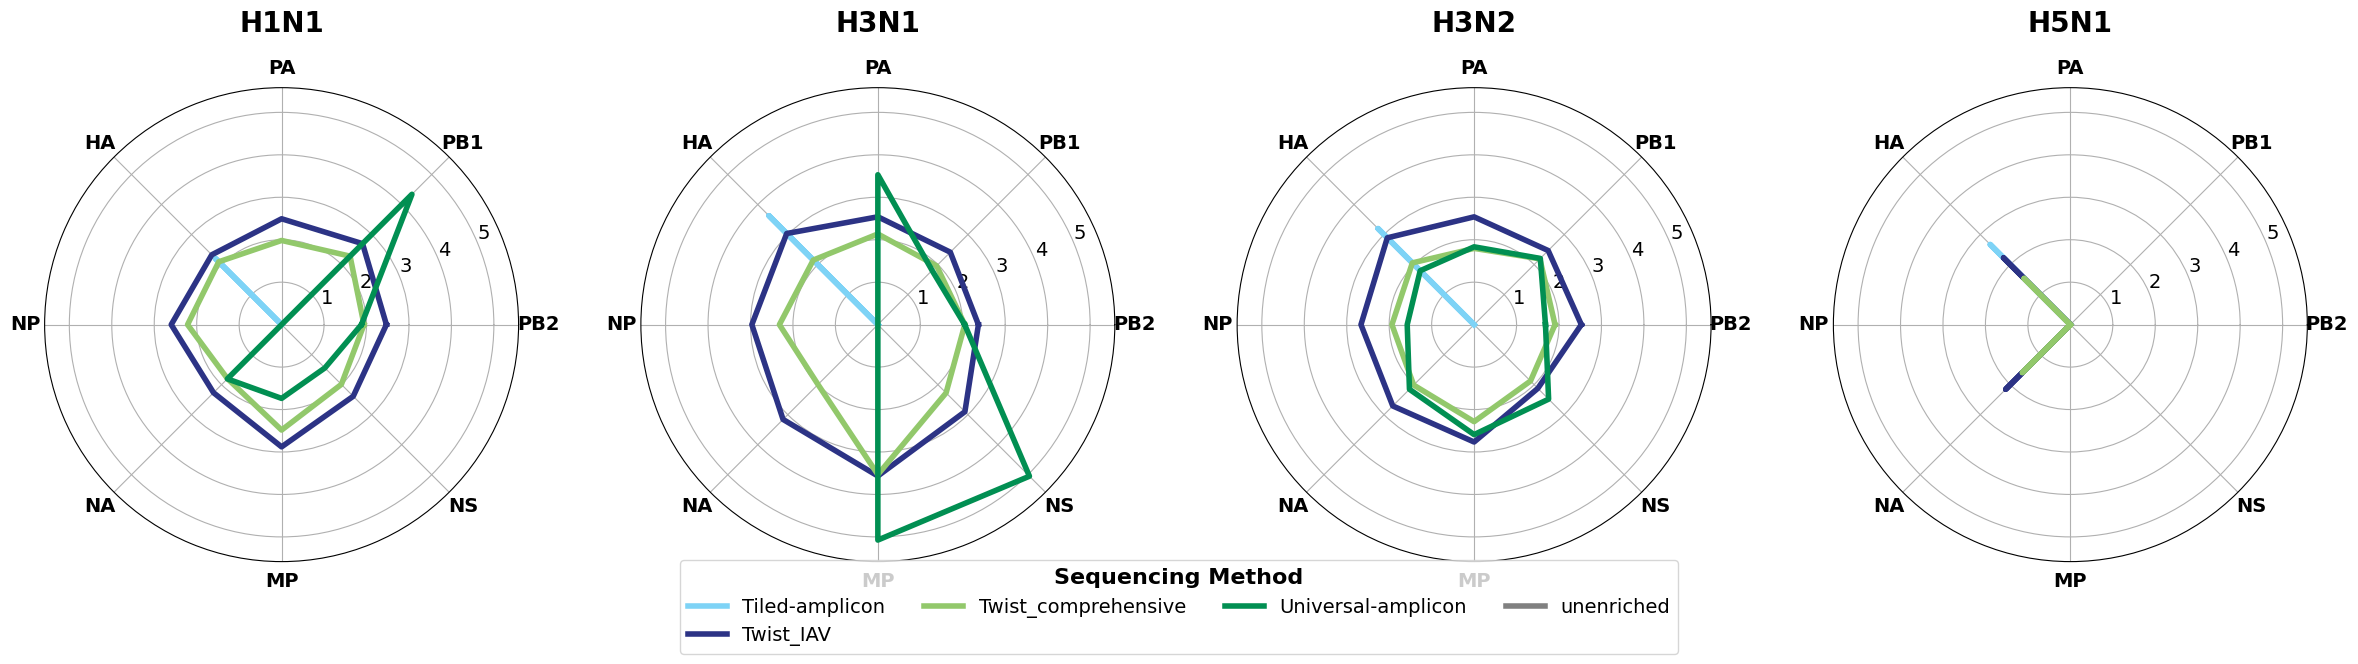

In [ ]:
df = summary_DM_depth_S1.copy()

# Define the eight genome segments in order
segments = ['PB2','PB1','PA','HA','NP','NA','MP','NS']
N = len(segments)

# Compute angles for radar axes
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Unique strains and methods
strains = df['strain'].unique()
methods = df['sequencing_method'].unique()
method_colors = dict(zip(methods, dot_colors))

# Create radar charts
fig, axes = plt.subplots(
    1, len(strains),
    figsize=(6 * len(strains), 6),
    subplot_kw=dict(polar=True)
)

for ax, strain in zip(axes, strains):
    subset = df[df['strain'] == strain]
    for method in methods:
        values = (
            subset[subset['sequencing_method'] == method]
                  .set_index('segment')
                  .reindex(segments)['mean_log_DP_rpkm']
                  .fillna(0)
                  .tolist()
        )
        values += values[:1]

        color = method_colors[method]
        ax.plot(angles, values, color=color, linewidth=4)      # thicker lines


    # Configure axes
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(segments, fontsize=14, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    ax.set_ylim(0, df['mean_log_DP_rpkm'].max() * 1.1)
    ax.set_title(strain, fontsize=20, fontweight='bold', y=1.1)

# Create legend at bottom
handles = [plt.Line2D([0], [0], color=method_colors[m], lw=4) for m in methods]
fig.legend(
    handles, methods,
    loc='lower center',
    ncol=4,
    bbox_to_anchor=(0.5, -0.1),
    fontsize=14,
    title="Sequencing Method"
)
plt.setp(fig.legends[0].get_title(), fontsize=16, fontweight='bold')

plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()


In [ ]:
summary_DM_depth_S3.head()
summary_DM_depth_S1.head()
summary_DM_depth.to_csv("/content/drive/My Drive/UC Berkeley/IAV_seq_results/Figure2b.csv")

# **Section 2 Concentration method and virus decay**

In [ ]:
IM =calculated_final[calculated_final.sample_id.isin(['IP_0h_1', 'IP_3h_1', 'IP_3h_2' ,'IP_3h_3' ,'PMG_0h_1',
 'PMG_3h_1', 'PMG_3h_3' ,'PMG_3h_2'])].copy()
IM["segment"] = IM["segment"].astype(str)
IM["segment"] = IM["segment"].replace("nan", "NA")

# Step 1: Replace zeros and negatives to avoid log10 issues
IM['log_DP_rpkm_undedupe'] = IM['DP_rpkm_undedupe'].copy()
IM.loc[IM['DP_rpkm_undedupe'] <= 0, 'log_DP_rpkm_undedupe'] = np.nan  # Replace zeros/negatives with NaN

# Step 2: Apply log10 transformation only to valid (positive) values
IM['log_DP_rpkm_undedupe'] = np.log10(IM['log_DP_rpkm_undedupe'])

# Step 3: Replace NaNs with explicit zero for plotting
IM['log_DP_rpkm_undedupe'] = IM['log_DP_rpkm_undedupe'].fillna(0)

# Step 4: Ensure all required columns are numeric
IM['POSITION'] = pd.to_numeric(IM['POSITION'], errors='coerce')

# Create a new column to group sample_ids
IM['sample_group'] = IM['sample_id'].replace({
    'IP_0h_1': 'IP_0h',
    'IP_3h_1': 'IP_3h',
    'IP_3h_2': 'IP_3h',
    'IP_3h_3': 'IP_3h',
    'PMG_0h_1': 'PMG_0h',
    'PMG_3h_1': 'PMG_3h',
    'PMG_3h_2': 'PMG_3h',
    'PMG_3h_3': 'PMG_3h'
})

IM_summary = (IM.groupby(['sample_group', 'sequencing_method', 'strain', 'WW_method', 'segment'], as_index=False)
    .agg(
        mean_mapped_rpkm_undedupe=('mapped_rpkm_undedupe', 'mean'),
        std_mapped_rpkm_undedupe=('mapped_rpkm_undedupe', 'std'),
        mean_gene_copies=('gene copies', 'mean'),
        std_gene_copies=('gene copies', 'std'),
        mean_coverage=('coverage', 'mean'),
        std_coverage=('coverage', 'std')
    ))


#IM_summary.head()

IM_HA_summary=IM_summary[IM_summary['segment'] == 'HA'].copy()
IM_HA_summary.head()

sample_group sequencing_method strain WW_method segment  \
0         IP_0h    Tiled-amplicon   H1N1        IP      HA   
1         IP_0h    Tiled-amplicon   H3N1        IP      HA   
2         IP_0h    Tiled-amplicon   H3N2        IP      HA   
3         IP_0h         Twist_IAV   H1N1        IP      HA   
11        IP_0h         Twist_IAV   H3N1        IP      HA   

    mean_mapped_rpkm_undedupe  std_mapped_rpkm_undedupe  mean_gene_copies  \
0                38498.030497                       0.0            3520.0   
1                 7628.856831                       0.0             331.4   
2               238882.254010                       0.0           23416.0   
3                 2446.439232                       0.0           10560.0   
11                 672.525467                       0.0             994.2   

    std_gene_copies  mean_coverage  std_coverage  
0               0.0        87.3604           0.0  
1               0.0        97.0903           0.0  
2               0.0        99.2874           0.0  
3               0.0       100.0000           0.0  
11              0.0        99.7625           0.0

## **Figure 2a and 2b**

In [ ]:
IAV_select=IM_HA_summary[IM_HA_summary['sample_group'].str.contains('_3h')].copy()
IAV_select.to_csv('/content/drive/My Drive/UC Berkeley/IAV_seq_results/Figure3b.csv')

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 10 x 2.5 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: /content/drive/My Drive/UC Berkeley/IAV_seq_results/Figures/plot2b1_updated.png
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


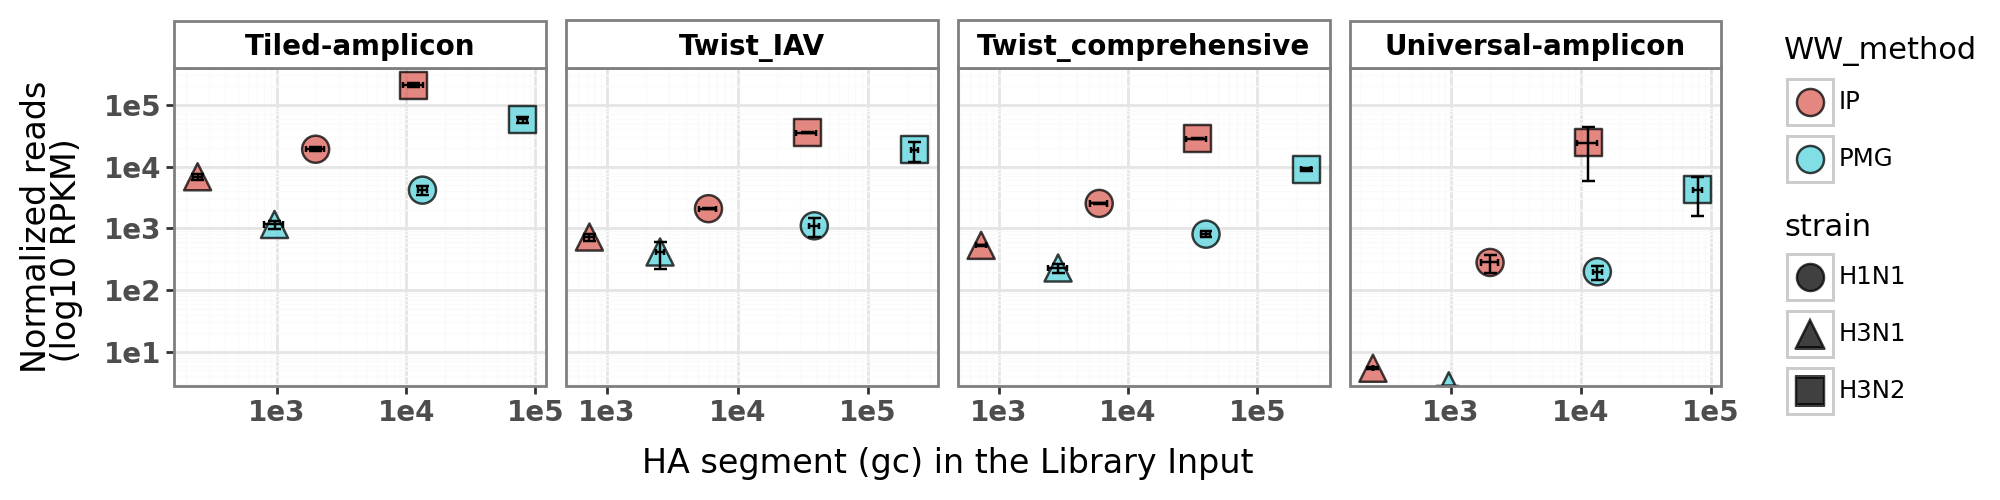

In [ ]:
plot2a = (
    ggplot(IAV_select, aes(x='mean_gene_copies', y='mean_mapped_rpkm_undedupe',
                           fill='WW_method', shape='strain')) +
    geom_point(alpha=0.75, size=5) +
    geom_errorbar(
        aes(ymin='mean_mapped_rpkm_undedupe - std_mapped_rpkm_undedupe',
            ymax='mean_mapped_rpkm_undedupe + std_mapped_rpkm_undedupe'),
        width=0.1,
        alpha=1
    ) +

    geom_errorbarh(
        aes(xmin='mean_gene_copies - std_gene_copies',
            xmax='mean_gene_copies + std_gene_copies'),
        height=0.1,
        alpha=1
    ) +

    scale_y_log10() +
    scale_x_log10()+
    xlab('HA segment (gc) in the Library Input') +
    ylab('Normalized reads\n (log10 RPKM)') +
    facet_wrap('~sequencing_method', ncol=4, scales='free_x') +
    theme_bw() +
    theme(
        figure_size=(10, 2.5),
        legend_position="right",
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        axis_text_x=element_text(size=10, weight='bold'),
        axis_text_y=element_text(size=10, weight='bold'),
        strip_background=element_rect(fill="white"),
        strip_text=element_text(size=10, color='black', weight='bold'),  # Bold facet titles
    )
)
plot2a.save("/content/drive/My Drive/UC Berkeley/IAV_seq_results/Figures/plot2b1_updated.png", dpi=300)
display(plot2a)


/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 10 x 2.5 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: /content/drive/My Drive/UC Berkeley/IAV_seq_results/Figures/plotb2_updated.png


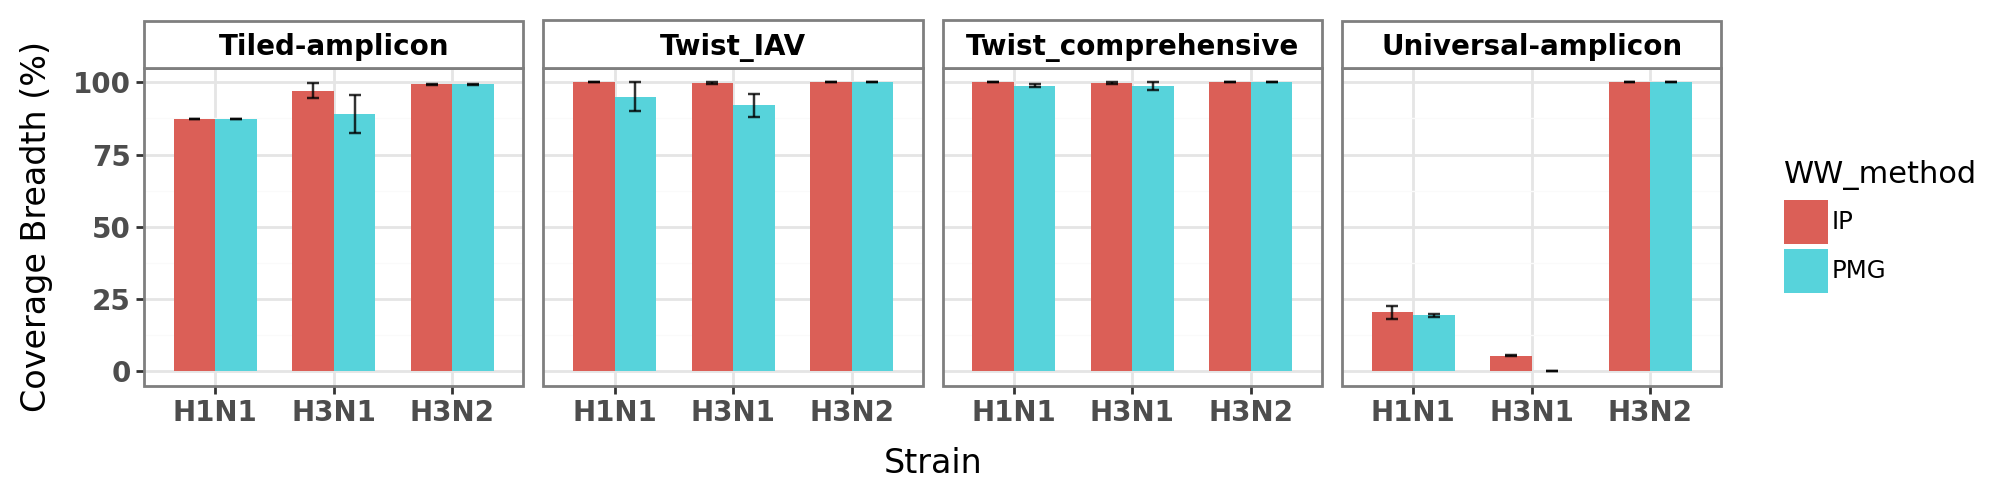

In [ ]:
plot2b_bar = (
    ggplot(IAV_select, aes(x='strain', y='mean_coverage',
                              fill='WW_method')) +
    geom_bar(stat='identity', position='dodge', width=0.7) +
    geom_errorbar(
        aes(ymin='mean_coverage - std_coverage',
            ymax='mean_coverage + std_coverage'),
        position=position_dodge(width=0.7),
        width=0.2,
        alpha=0.8
    ) +

    xlab('Strain') +
    ylab('Coverage Breadth (%)') +
    facet_wrap('~sequencing_method', ncol=4, scales='free_x') +
    theme_bw() +
    theme(
        figure_size=(10, 2.5),
        legend_position="right",
        axis_title_x=element_text(size=12),
        axis_title_y=element_text(size=12),
        axis_text_x=element_text(size=10, weight='bold'),
        axis_text_y=element_text(size=10, weight='bold'),
        strip_background=element_rect(fill="white"),
        strip_text=element_text(size=10, color='black', weight='bold'),
    )
)
plot2b_bar.save("/content/drive/My Drive/UC Berkeley/IAV_seq_results/Figures/plotb2_updated.png", dpi=300)
display(plot2b_bar)



## **Figure 2c: impact of concentration method and incubation on HA segment genome integrity**

In [ ]:
IM_tiled=IM[IM.sequencing_method == 'Tiled-amplicon'].copy()
IM_comp=IM[IM.sequencing_method == 'Twist_comprehensive'].copy()
IM_IAV=IM[IM.sequencing_method == 'Twist_IAV'].copy()
IM_HA=IM[IM.segment == 'HA'].copy()
IM_HA_summary=IM_HA.groupby(['sample_group','sequencing_method','WW_method','strain','POSITION','segment'])['log_DP_rpkm_undedupe'].mean().reset_index()
IM_HA_summary.to_csv('/content/drive/My Drive/UC Berkeley/IAV_seq_results/Figure3c.csv')
IM_HA_summary.head()

sample_group sequencing_method WW_method strain  POSITION segment  \
0        IP_0h    Tiled-amplicon        IP   H1N1       1.0      HA   
1        IP_0h    Tiled-amplicon        IP   H1N1       2.0      HA   
2        IP_0h    Tiled-amplicon        IP   H1N1       3.0      HA   
3        IP_0h    Tiled-amplicon        IP   H1N1       4.0      HA   
4        IP_0h    Tiled-amplicon        IP   H1N1       5.0      HA   

   log_DP_rpkm_undedupe  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 9 x 5 in image.
/usr/local/lib/python3.11/dist-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: /content/drive/My Drive/UC Berkeley/IAV_seq_results/Figures/plot1c_updated.png


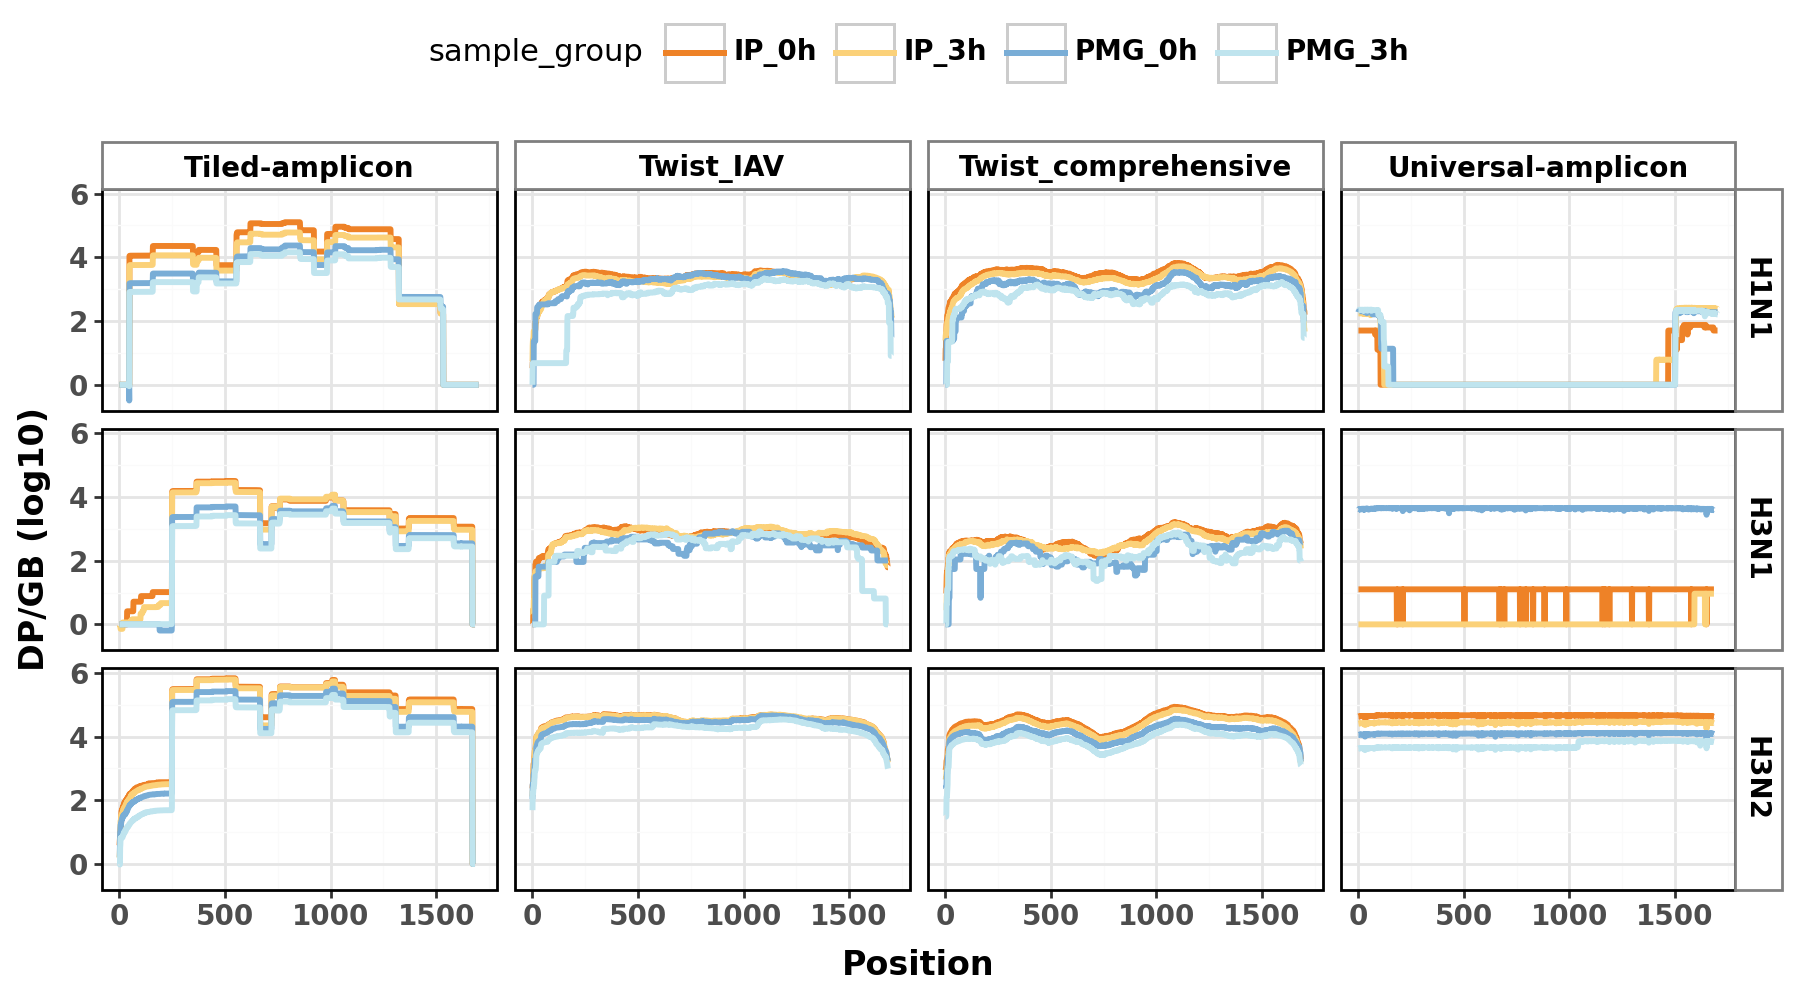

In [ ]:
color_mapping = {
    'IP_0h': '#EE8227',
    'IP_3h': '#FBD179',
    'PMG_0h': '#79ADD6',
    'PMG_3h': '#BFE4EE'
}
plot2c = (
    ggplot(IM_HA_summary, aes(x='POSITION', y='log_DP_rpkm_undedupe', color='sample_group')) +
    geom_line(size=1.2) +
    facet_grid('strain ~ sequencing_method') +
    labs(
        x='Position',
        y='DP/GB (log10)',
    ) +
    scale_color_manual(values=color_mapping) +
    theme_bw() +
    theme(
        figure_size=(9, 5),
        axis_text_x=element_text(size=10, weight='bold',),
        axis_text_y=element_text(size=10, weight='bold'),
        axis_title_x=element_text(size=12, weight='bold'),
        axis_title_y=element_text(size=12, weight='bold'),
        strip_background=element_rect(fill="white"),
        strip_text=element_text(size=10, color='black', weight='bold'),
        plot_title=element_text(size=12, weight='bold'),
        panel_border=element_rect(color='black', fill=None),
        legend_key_height=5,
        legend_key_width=23,
        legend_position='top',
        legend_text=element_text(size=10, weight='bold'),
    )
)
plot2c.save("/content/drive/My Drive/UC Berkeley/IAV_seq_results/Figures/plot1c_updated.png", dpi=300)
display(plot2c)


## **Figure 2d or SI: All segments' genome integrity**

In [ ]:
# Define the order of segments
segment_order = ["NS", "MP", "NA", "NP", "HA", "PA", "PB1", "PB2"]
IM_summary["segment"] = pd.Categorical(IM_summary["segment"], categories=segment_order, ordered=True)
IM_summary.head()

sample_group sequencing_method strain WW_method segment  \
0        IP_0h    Tiled-amplicon   H1N1        IP      HA   
1        IP_0h    Tiled-amplicon   H3N1        IP      HA   
2        IP_0h    Tiled-amplicon   H3N2        IP      HA   
3        IP_0h         Twist_IAV   H1N1        IP      HA   
4        IP_0h         Twist_IAV   H1N1        IP      MP   

   mean_mapped_rpkm_undedupe  std_mapped_rpkm_undedupe  mean_gene_copies  \
0               38498.030497                       0.0            3520.0   
1                7628.856831                       0.0             331.4   
2              238882.254010                       0.0           23416.0   
3                2446.439232                       0.0           10560.0   
4                9673.558480                       0.0           10560.0   

   std_gene_copies  mean_coverage  std_coverage  
0              0.0        87.3604           0.0  
1              0.0        97.0903           0.0  
2              0.0        99.2874           0.0  
3              0.0       100.0000           0.0  
4              0.0       100.0000           0.0

In [ ]:
IM["segment"] = pd.Categorical(IM["segment"], categories=segment_order, ordered=True)
IM_new = IM[[
    'sample_id',
    'WW_method',
    'strain',
    'sequencing_method',
    'segment',
    'coverage',
    'mapped_rpkm_undedupe',
    'sample_group'
]].copy()
IM_new = IM_new.drop_duplicates()
IM_new.head()

sample_id WW_method strain   sequencing_method segment  coverage  \
217764   IP_0h_1        IP   H1N1  Universal-amplicon      HA   19.9295   
219465   IP_0h_1        IP   H1N1  Universal-amplicon      MP  100.0000   
220447   IP_0h_1        IP   H1N1  Universal-amplicon      NA   99.7163   
221857   IP_0h_1        IP   H1N1  Universal-amplicon      NP    0.0000   
221858   IP_0h_1        IP   H1N1  Universal-amplicon      NS  100.0000   

        mapped_rpkm_undedupe sample_group  
217764             67.245777        IP_0h  
219465          50203.628714        IP_0h  
220447              8.112416        IP_0h  
221857              0.000000        IP_0h  
221858          17335.206882        IP_0h

In [ ]:
IM0 = IM_new[IM_new['sample_group'].str.contains('0h')].copy()
IM3 = IM_new[IM_new['sample_group'].str.contains('3h')].copy()

# Drop duplicates
IM0 = IM0.drop_duplicates(subset=['strain','segment','sequencing_method','WW_method'])

# Merge each 3h replicate with its 0h partner
IM_final = pd.merge(IM3,
    IM0[['strain','segment','sequencing_method','WW_method','coverage','mapped_rpkm_undedupe']],
    on=['strain','segment','sequencing_method','WW_method'],
    how='left',
    suffixes=('','_0h')
)

# Compute fold‐change
IM_final['coverage_fold_change']= IM_final['coverage']/IM_final['coverage_0h']
IM_final['rpkm_fold_change']= IM_final['mapped_rpkm_undedupe']/IM_final['mapped_rpkm_undedupe_0h']

# log2‐fold‐change
IM_final['coverage_log2FC'] = np.log2(IM_final['coverage_fold_change'])
IM_final['rpkm_log2FC']     = np.log2(IM_final['rpkm_fold_change'])
IM_final.head()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2


sample_id WW_method strain   sequencing_method segment  coverage  \
0   IP_3h_1        IP   H1N1  Universal-amplicon      HA   23.4568   
1   IP_3h_1        IP   H1N1  Universal-amplicon      MP  100.0000   
2   IP_3h_1        IP   H1N1  Universal-amplicon      NA  100.0000   
3   IP_3h_1        IP   H1N1  Universal-amplicon      NP  100.0000   
4   IP_3h_1        IP   H1N1  Universal-amplicon      NS  100.0000   

   mapped_rpkm_undedupe sample_group  coverage_0h  mapped_rpkm_undedupe_0h  \
0            312.526600        IP_3h      19.9295                67.245777   
1          31594.427680        IP_3h     100.0000             50203.628714   
2           6110.433871        IP_3h      99.7163                 8.112416   
3           4977.738214        IP_3h       0.0000                 0.000000   
4           2548.444675        IP_3h     100.0000             17335.206882   

   coverage_fold_change  rpkm_fold_change  coverage_log2FC  rpkm_log2FC  
0              1.176989          4.647528         0.235101     2.216463  
1              1.000000          0.629326         0.000000    -0.668122  
2              1.002845        753.219985         0.004099     9.556927  
3                   inf               inf              inf          inf  
4              1.000000          0.147010         0.000000    -2.766016

In [ ]:
# Melt into long form for metrics
IM_long = pd.melt(
    IM_final,
    id_vars=['sequencing_method','WW_method','strain','segment'],
    value_vars=['coverage_log2FC','rpkm_log2FC'],
    var_name='metric', value_name='log2FC'
)

# Rename metrics
IM_long['metric'] = IM_long['metric'].map({'coverage_log2FC': 'Coverage log₂FC', 'rpkm_log2FC':'RPKM log₂FC'})

# 5. Compute mean, std, per group
summary = (
    IM_long
    .groupby(['WW_method','strain','sequencing_method','segment','metric'])
    .agg(mean_fc=('log2FC','mean'),
         std_fc=('log2FC','std'),)
    .reset_index()
)
# assuming your DataFrame is called `summary`
summary = summary.dropna(subset=['mean_fc','std_fc'])
summary.to_csv('/content/drive/My Drive/UC Berkeley/IAV_seq_results/Figure3d.csv', index=False)
summary.head()

/tmp/ipython-input-48-3999872511.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


WW_method strain sequencing_method segment           metric   mean_fc  \
8         IP   H1N1    Tiled-amplicon      HA  Coverage log₂FC  0.000647   
9         IP   H1N1    Tiled-amplicon      HA      RPKM log₂FC -1.012762   
16        IP   H1N1         Twist_IAV      NS  Coverage log₂FC -0.002878   
17        IP   H1N1         Twist_IAV      NS      RPKM log₂FC  0.041570   
18        IP   H1N1         Twist_IAV      MP  Coverage log₂FC  0.000000   

      std_fc  
8   0.000560  
9   0.142932  
16  0.004985  
17  0.128209  
18  0.000000

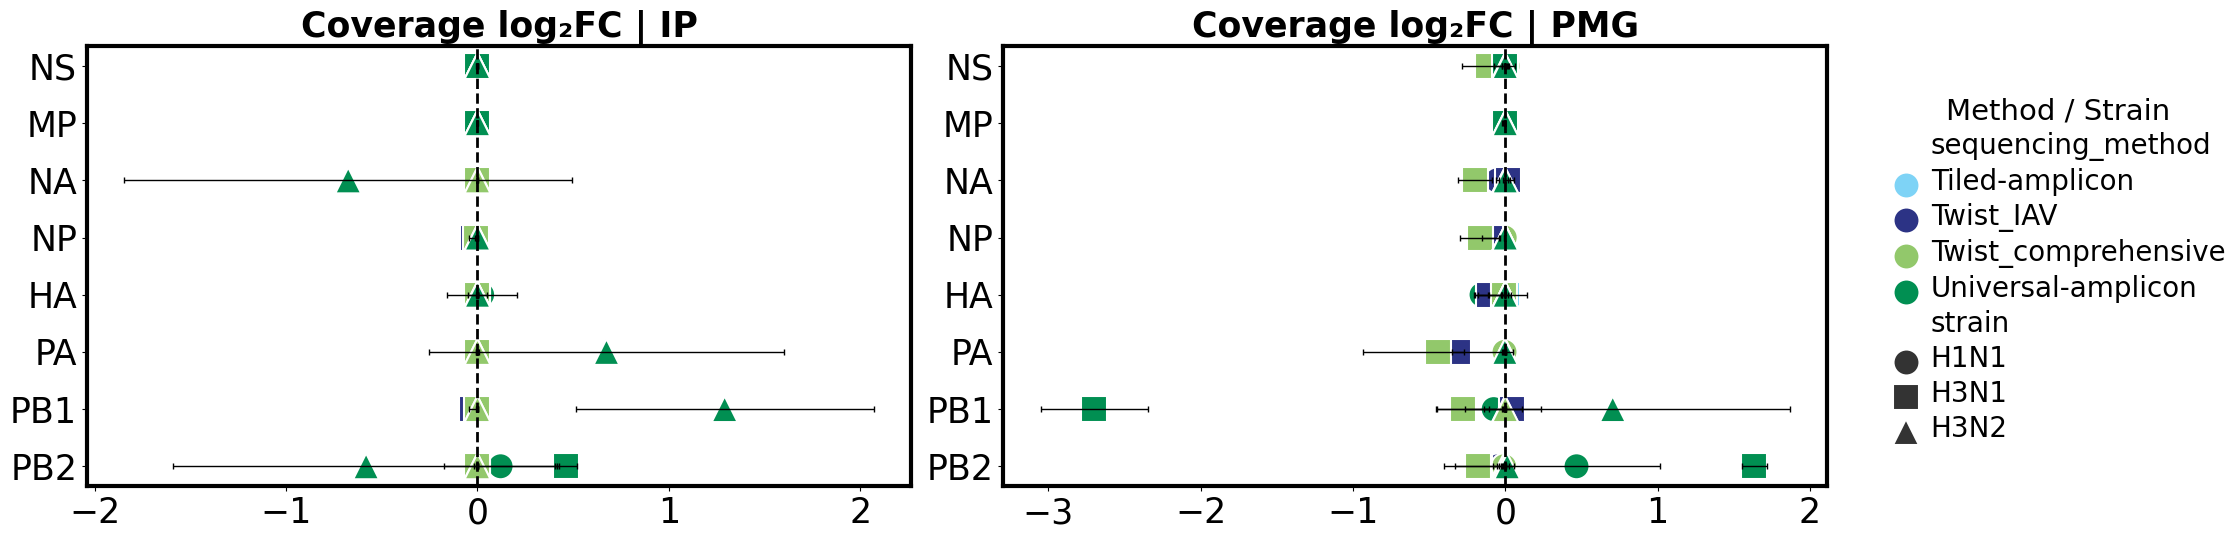

In [ ]:
# Filter for Coverage log₂FC
summary_cov = summary[summary['metric']=='Coverage log₂FC'].copy()

# check x-limits
min_edge = (summary_cov['mean_fc'] - summary_cov['std_fc']).min()
max_edge = (summary_cov['mean_fc'] + summary_cov['std_fc']).max()
pad = (max_edge - min_edge) * 0.1
x_min, x_max = min_edge - pad, max_edge + pad

# Extract unique sequencing methods and strains
methods = summary_cov['sequencing_method'].unique()
strains = summary_cov['strain'].unique()

# Define color palette and marker styles
palette = dict(zip(methods, dot_colors[:len(methods)]))
markers = dict(zip(strains, ['o', 's', '^', 'D', 'P'][:len(strains)]))

# Set up FacetGrid
g = sns.FacetGrid(
    summary_cov,
    row='metric', col='WW_method',
    sharex=False, sharey=False,
    height=5.5, aspect=1.5,
    legend_out=True
)

# Map scatterplot to each facet
g.map_dataframe(
    sns.scatterplot,
    x='mean_fc', y='segment',
    hue='sequencing_method',
    style='strain',
    palette=palette,
    markers=markers,
    s=350
)

# Add error bars and style each subplot
for ax in g.axes.flatten():
    # Draw zero-change reference line
    ax.axvline(0, color='black', linestyle='--', linewidth=2)

    # Extract facet title information
    facet_title = ax.get_title().replace('metric = ', '').replace(' | WW_method = ', '||').split('||')
    metric, ww = facet_title[0], facet_title[1]

    # Subset data
    sub = summary_cov[(summary_cov.metric == metric) & (summary_cov.WW_method == ww)]

    # Plot error bars
    for _, row in sub.iterrows():
        ax.errorbar(
            x=row['mean_fc'],
            y=row['segment'],
            xerr=row['std_fc'],
            fmt='none',
            ecolor='black',
            capsize=2,
            elinewidth=1
        )

    # Axis styling
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(3)

# Set facet titles
g.set_titles(
    row_template="{row_name}",
    col_template="{col_name}",
   size=25,
   weight='bold')

# Draw and style the combined legend
g.add_legend(
    title="Method / Strain",
    bbox_to_anchor=(1.02, 0.5),
    loc='center left'
)
legend = g._legend
legend.set_title("Method / Strain")
legend.get_title().set_fontsize(21)
for text in legend.get_texts():
    text.set_fontsize(20)

# Final layout
plt.tight_layout()
plt.show()


# **Section 3 Predicted v.s. actual coverage**

In [ ]:
predict=pd.read_csv('/content/drive/My Drive/UC Berkeley/IAV_seq_results/summary_predicted.csv')
predict = predict[['strain', 'segment', 'coverage_depth', 'coverage_breadth(%)']]
predict['segment'] = predict['segment'].fillna('NA')
predict = predict.rename(columns={'coverage_depth': 'DP_rpkm_dedup_paired'})
predict = predict.rename(columns={'coverage_breadth(%)': 'coverage'})
predict['sample_id']='predicted'

In [ ]:
IAV=calculated_final[calculated_final['sequencing_method']=='Twist_IAV'].copy()
IAV['segment'] = IAV['segment'].fillna('NA')
IAV_summary = IAV.groupby(['sample_id', 'strain', 'segment'])[['coverage', 'DP_rpkm_dedup_paired']].mean().reset_index()
IAV_summary.head()
IAV_S1=IAV_summary[IAV_summary['sample_id']=='S1'].copy()
combine=pd.concat([IAV_summary,predict])
combine.head()

sample_id strain segment  coverage  DP_rpkm_dedup_paired
0   IP_0h_1   H1N1      HA     100.0            926.879890
1   IP_0h_1   H1N1      MP     100.0           3295.648226
2   IP_0h_1   H1N1      NA     100.0            921.601844
3   IP_0h_1   H1N1      NP     100.0           1747.929965
4   IP_0h_1   H1N1      NS     100.0           1058.988613

In [ ]:
print(IAV['segment'].unique())

['HA' 'MP' 'NA' 'NP' 'NS' 'PA' 'PB1' 'PB2']


In [ ]:
# Extract predicted sample coverage
predicted_df = combine[combine["sample_id"] == "predicted"].rename(columns={"coverage": "predicted_coverage"})
others=combine[combine["sample_id"] != "predicted"].copy()
# Merge predicted coverage with other samples based on strain and segment
merged_df = combine[combine["sample_id"] != "predicted"].merge(predicted_df[["strain", "segment", "predicted_coverage"]],
                                                                 on=["strain", "segment"], how="right")

merged_df=merged_df[merged_df['sample_id']!="S4"]
merged_df.head()

sample_id strain segment  coverage  DP_rpkm_dedup_paired  predicted_coverage
0   IP_0h_1   H1N1      HA  100.0000            926.879890               100.0
1   IP_3h_1   H1N1      HA  100.0000            772.437138               100.0
2   IP_3h_2   H1N1      HA  100.0000            746.493011               100.0
3   IP_3h_3   H1N1      HA  100.0000            735.786764               100.0
4  PMG_0h_1   H1N1      HA   99.6473            550.014456               100.0

In [ ]:
# Add comparison column
merged_df['prediction_vs_observed'] = merged_df['predicted_coverage'] - merged_df['coverage']

# Group and count over/under predictions per strain × segment
result = (
    merged_df.groupby(['strain'])
    .apply(lambda group: pd.Series({
        'n_predicted_higher': (group['predicted_coverage'] > group['coverage']).sum(),
        'n_predicted_lower': (group['predicted_coverage'] < group['coverage']).sum(),
        'n_predicted_equal': (group['predicted_coverage'] == group['coverage']).sum()
    }))
    .reset_index()
)
result

<ipython-input-94-5e04e1d5428c>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


strain  n_predicted_higher  n_predicted_lower  n_predicted_equal
0   H1N1                  57                  8                 15
1   H3N1                   6                 74                  0
2   H3N2                  13                 63                  4
3   H5N1                   4                  2                  0

/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


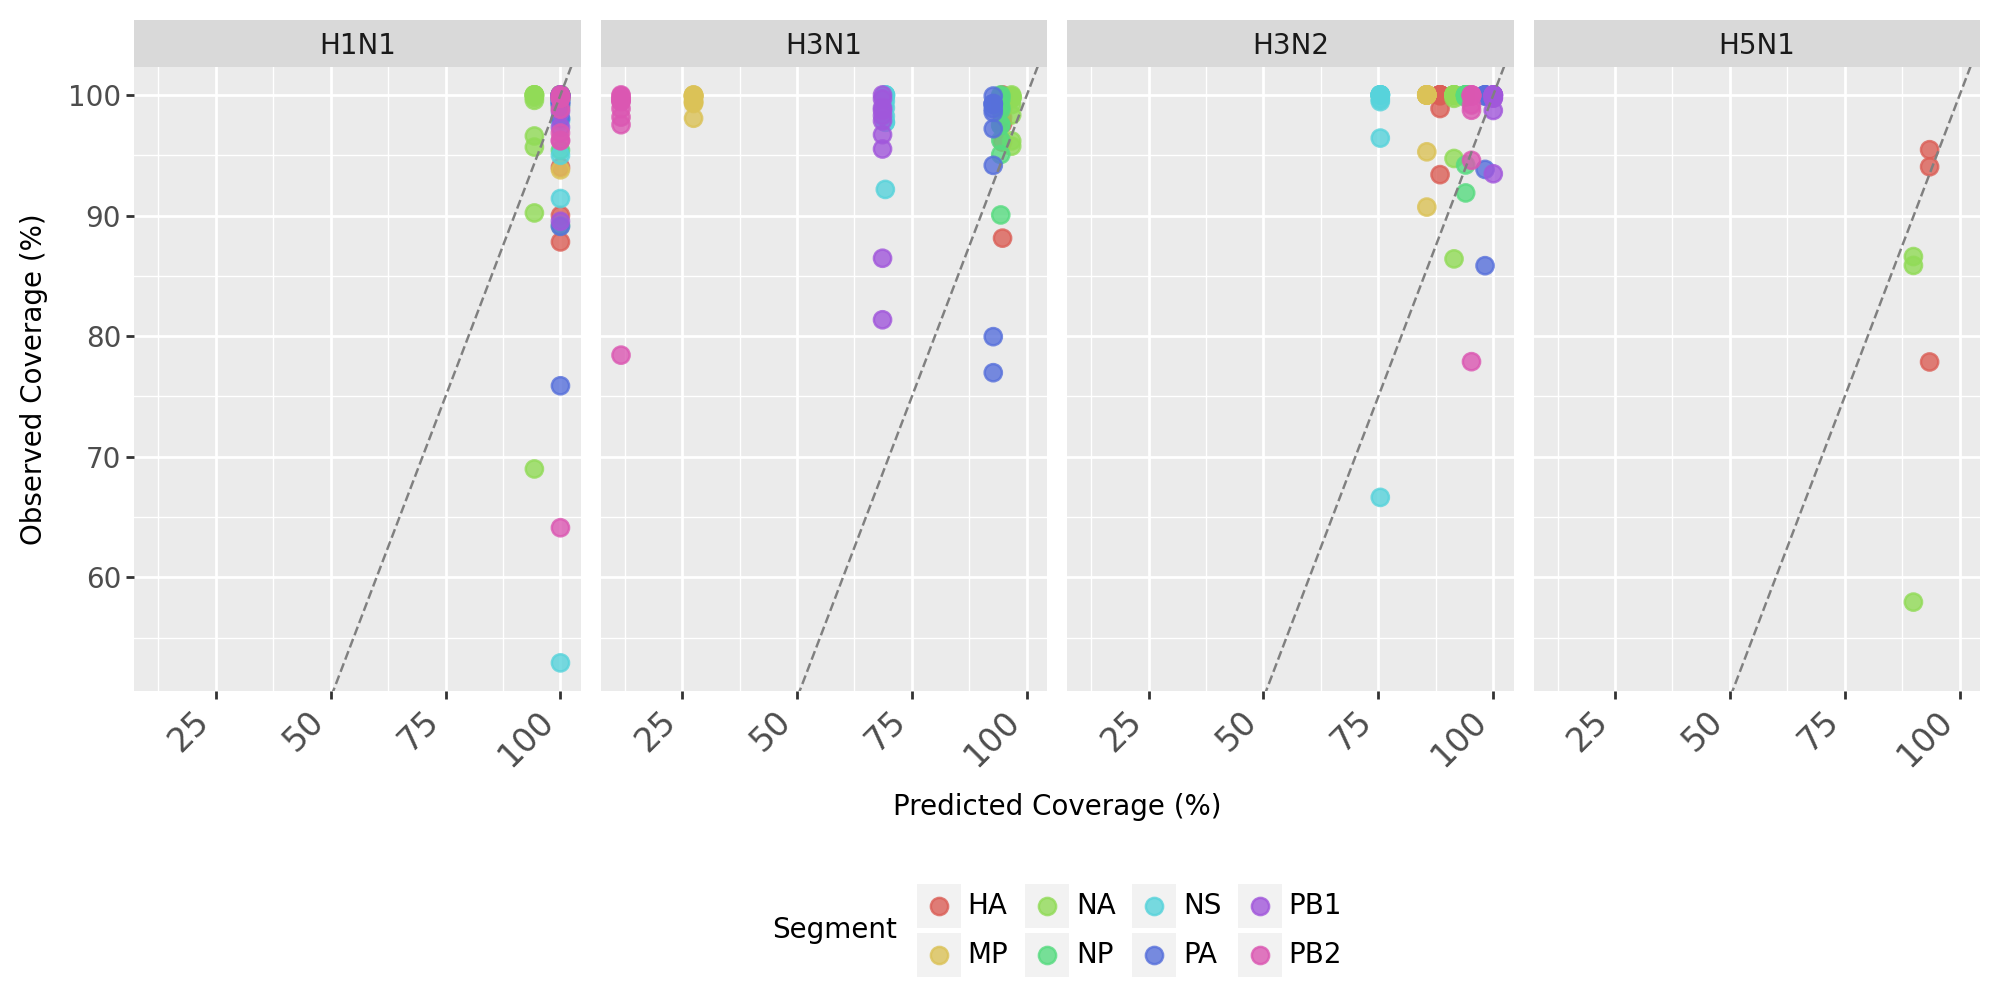

In [ ]:
# Scatter plot: Predicted coverage (x-axis) vs. Other samples' coverage (y-axis)
p = (
    ggplot(merged_df, aes(x="predicted_coverage", y="coverage", color="segment")) +
    geom_point(size=3, alpha=0.8) +
    geom_abline(slope=1, intercept=0, linetype="dashed", color="gray") +
    facet_wrap('~ strain',ncol=4) +
    labs(
         x="Predicted Coverage (%)", y="Observed Coverage (%)",
         color="Segment") +
    theme(figure_size=(10, 5),
        axis_text_x=element_text(rotation=45, ha='right', size=12),
        axis_text_y=element_text(size=10),
        axis_title_x=element_text(size=10),
        axis_title_y=element_text(size=10),
        strip_text=element_text(size=10),
        legend_position='bottom',
        legend_text=element_text(size=10),
        legend_title=element_text(size=10))
)

display(p)


/usr/local/lib/python3.11/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


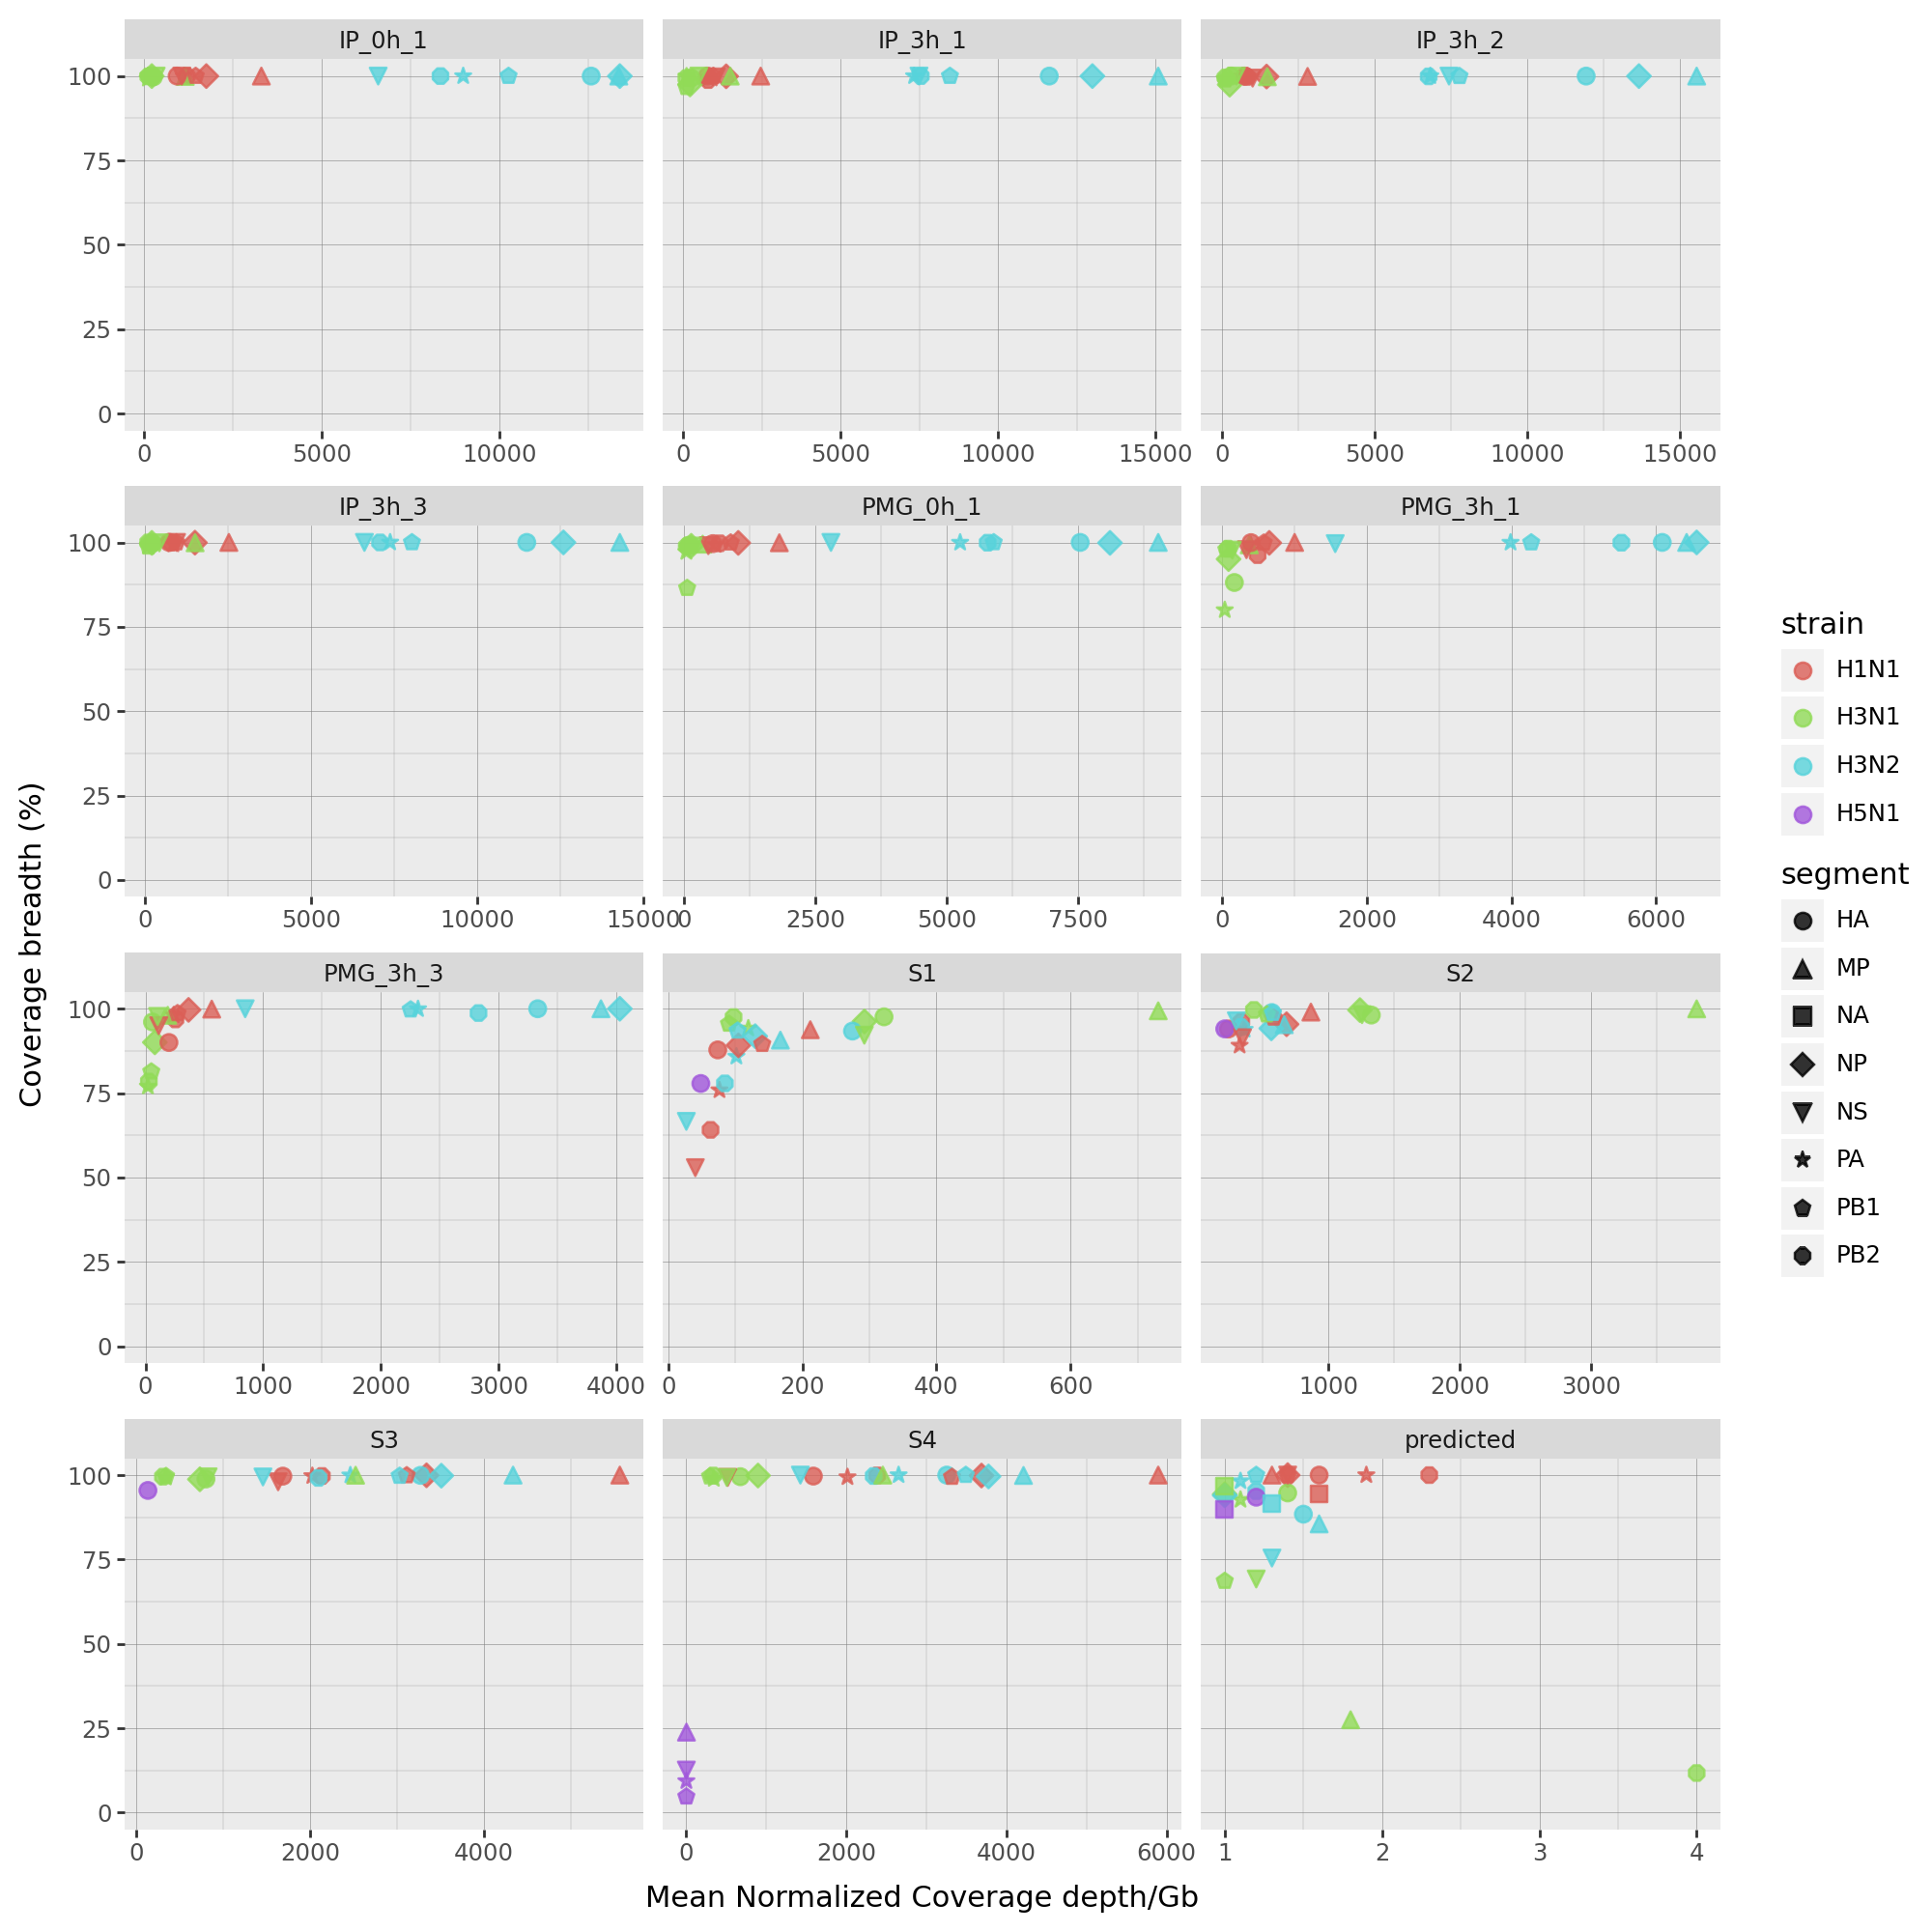

In [ ]:
plot = (
    ggplot(combine, aes(x='DP_rpkm_dedup_paired', y='coverage', color='strain', shape='segment'))
    + geom_point(size=3, alpha=0.8)
    +facet_wrap('~sample_id',ncol=3, scales='free_x')
    +
    labs(
        x='Mean Normalized Coverage depth/Gb',
        y='Coverage breadth (%)'
    )
    + theme( figure_size=(10, 10),
            panel_grid_major=element_line(color="gray", size=0.2),
            panel_grid_minor=element_line(color="gray", size=0.1))
)
display(plot)